In [615]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
%matplotlib inline

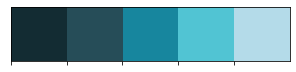

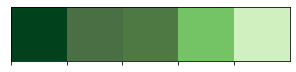

In [616]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)

In [617]:
data=pd.read_csv('Automobile.csv')
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [314]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
profile=ProfileReport(data,title='Pandas Profiling Report')
profile.to_file("Pandas_Profiling_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [618]:
data.shape

(201, 26)

# Categorical Data Distributions

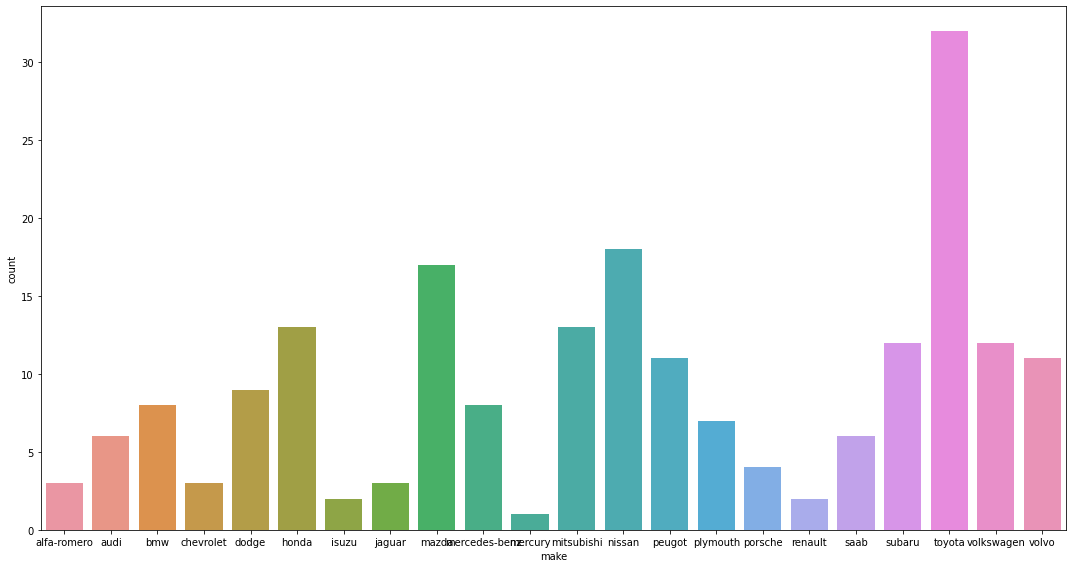

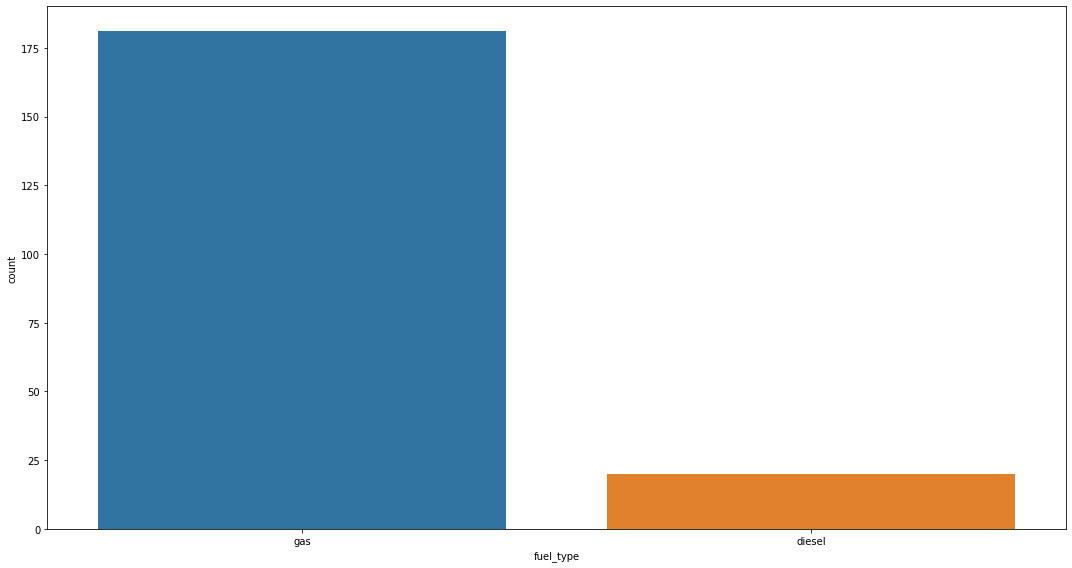

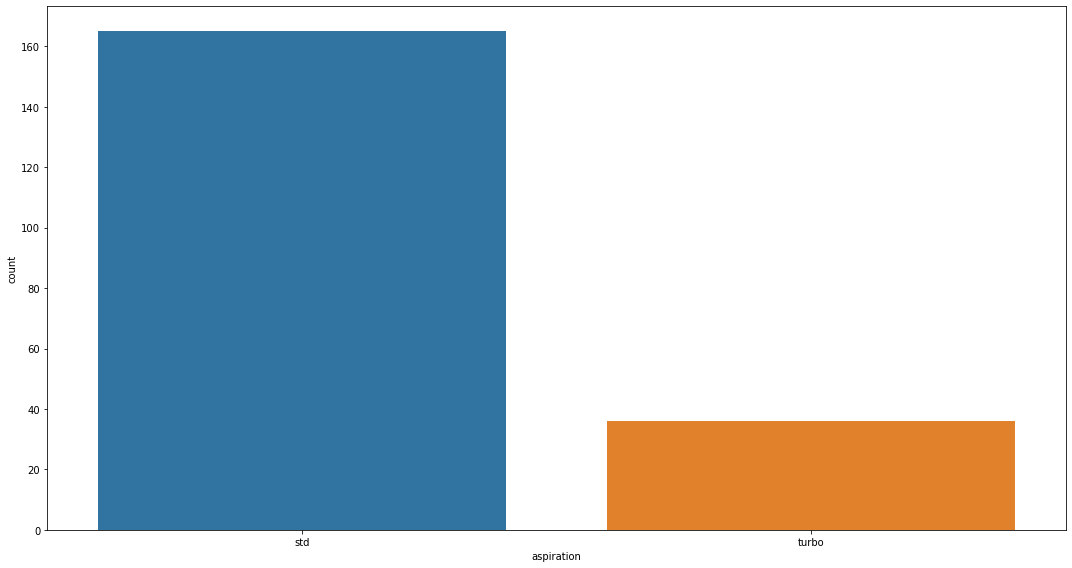

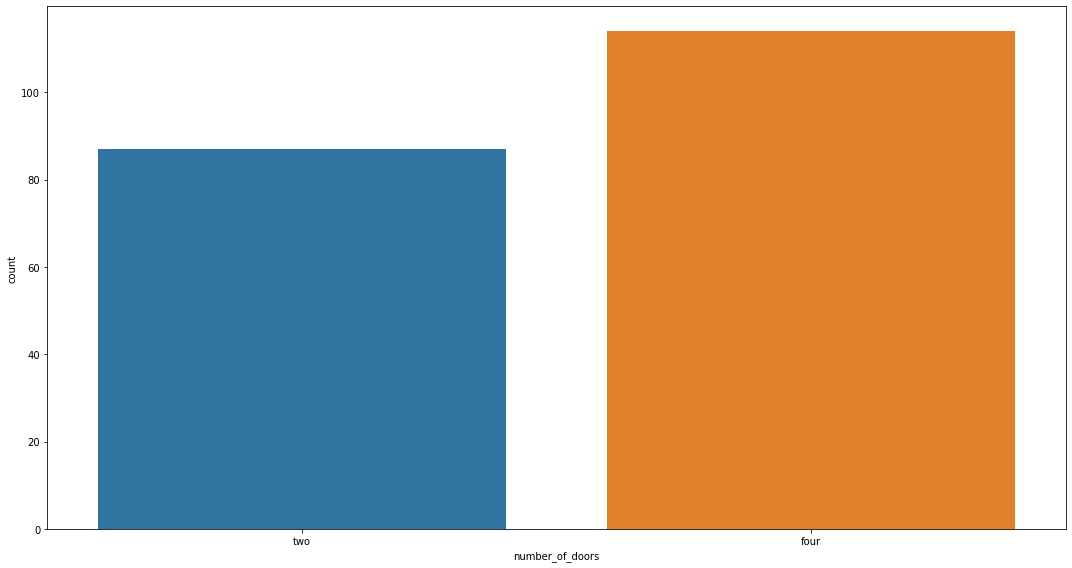

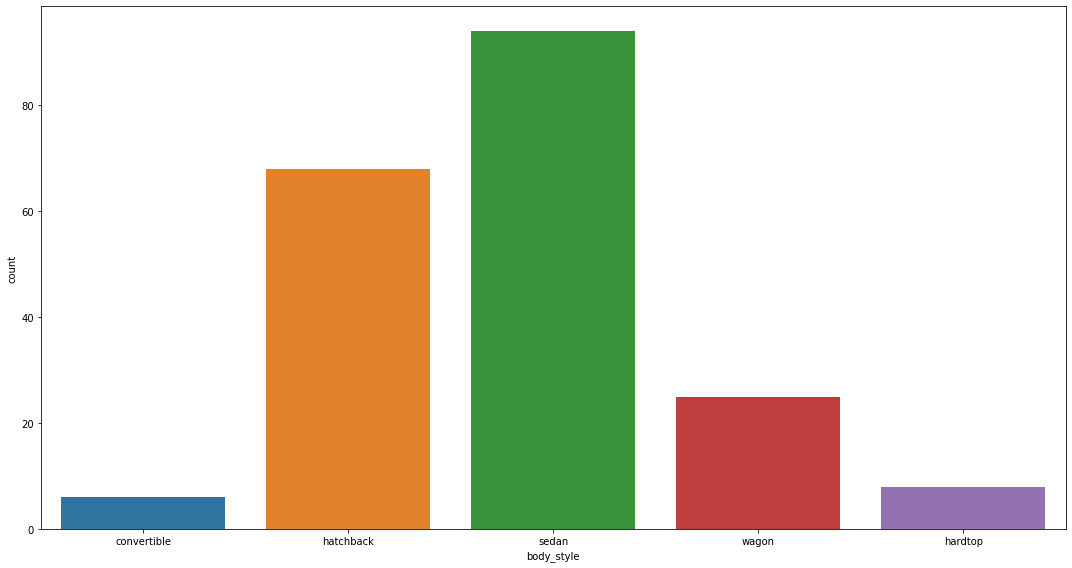

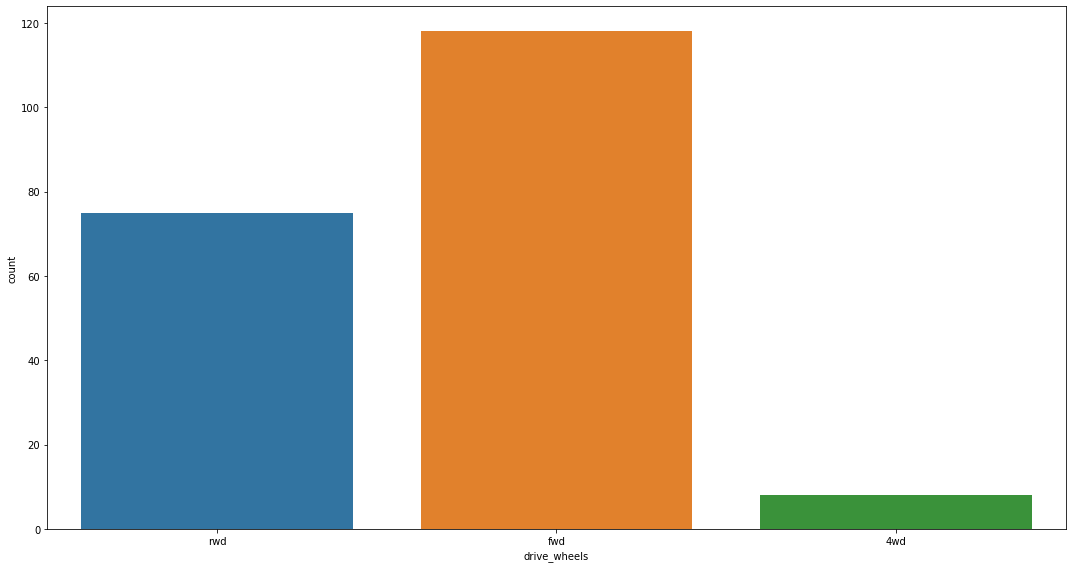

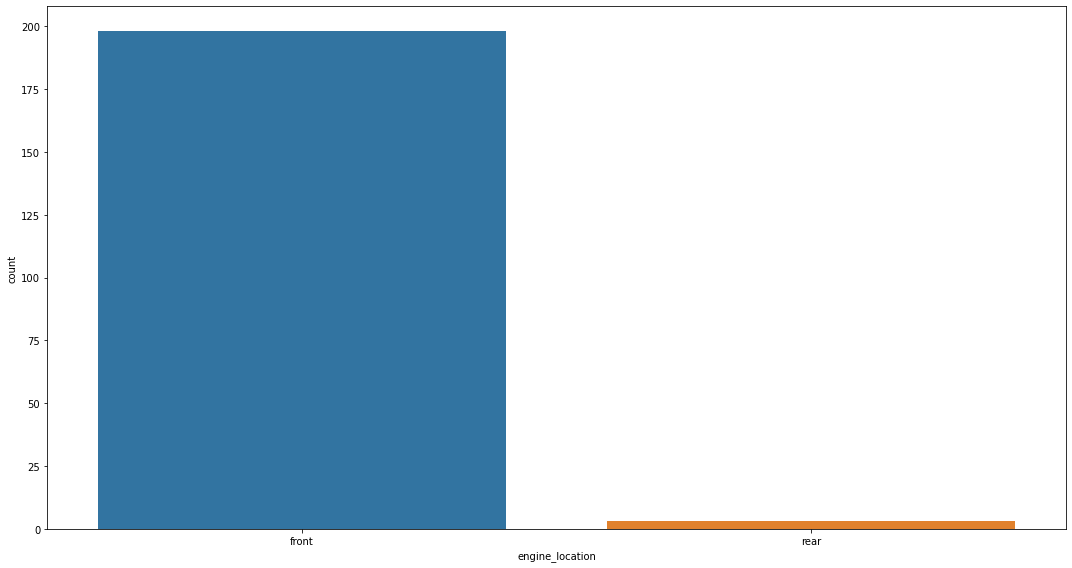

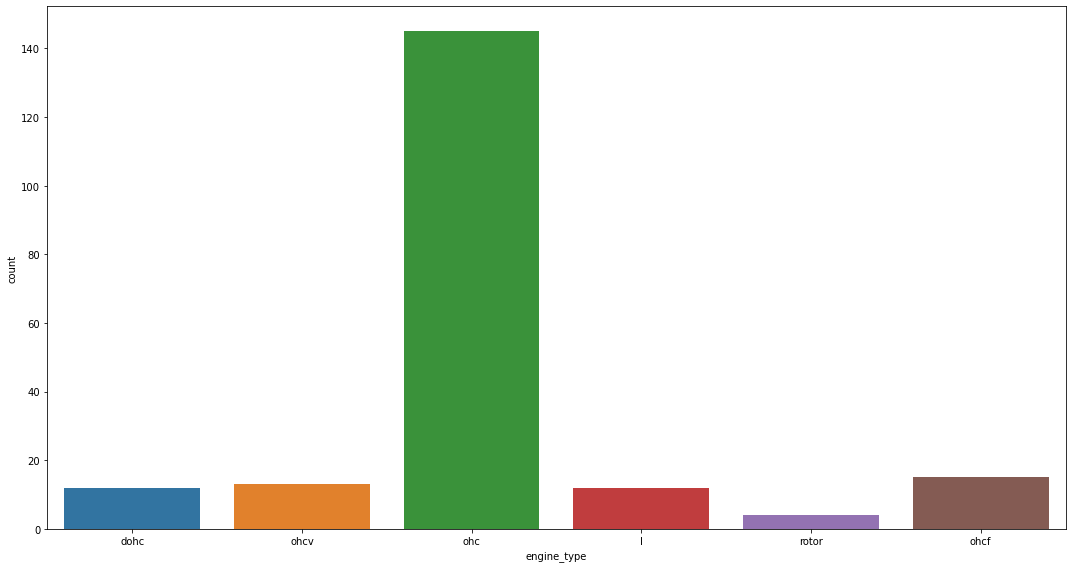

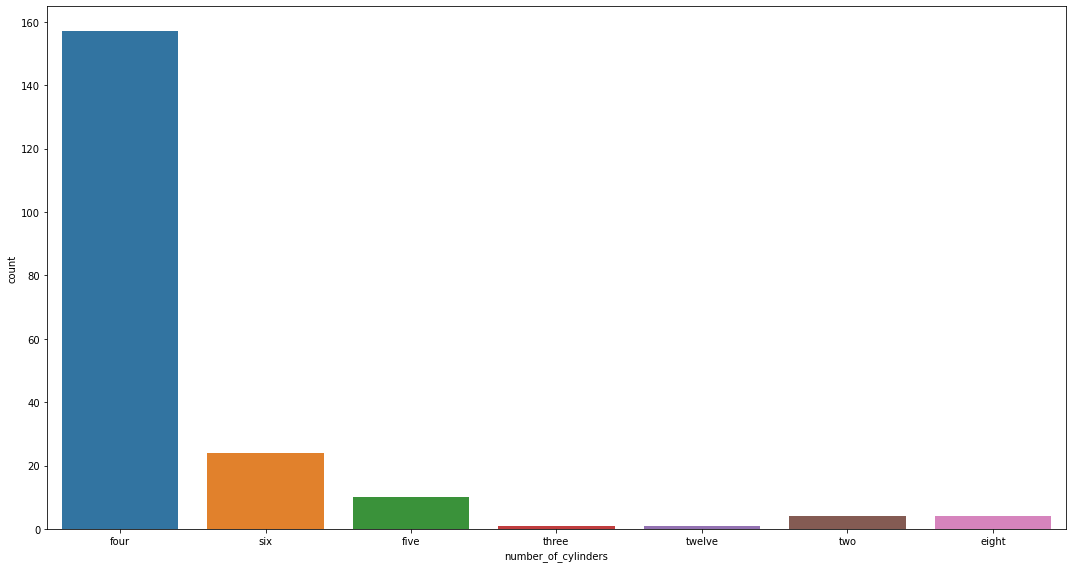

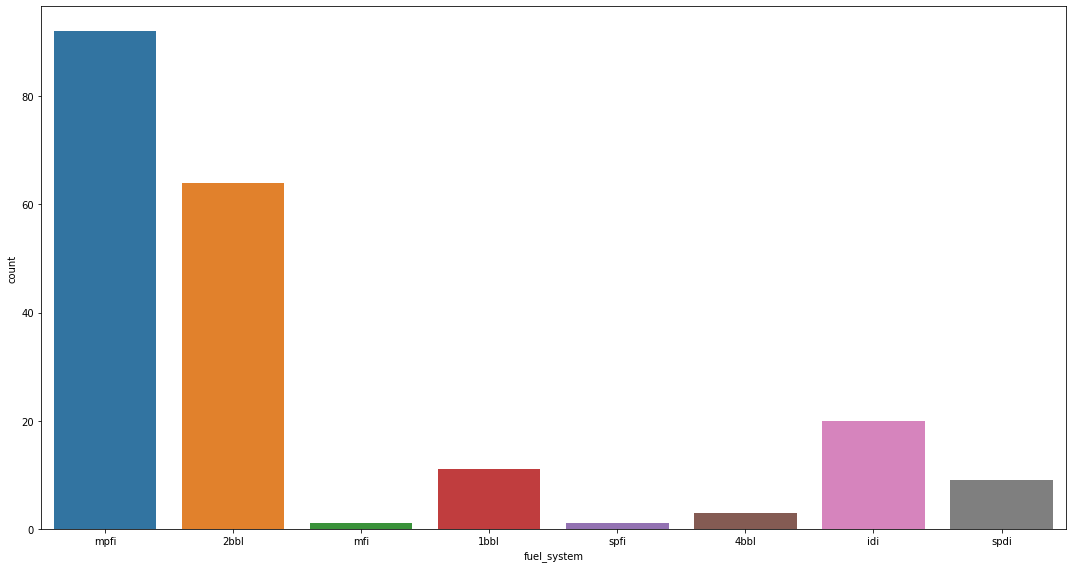

In [619]:
for i in data.columns:
    if(data[i].dtype=='object'):
        plt.figure(figsize=(15,8))
        plt.subplot(111)
        sns.countplot(data=data,x=i)
        plt.tight_layout()

### Top 10 distributions of categorical data of automobiles

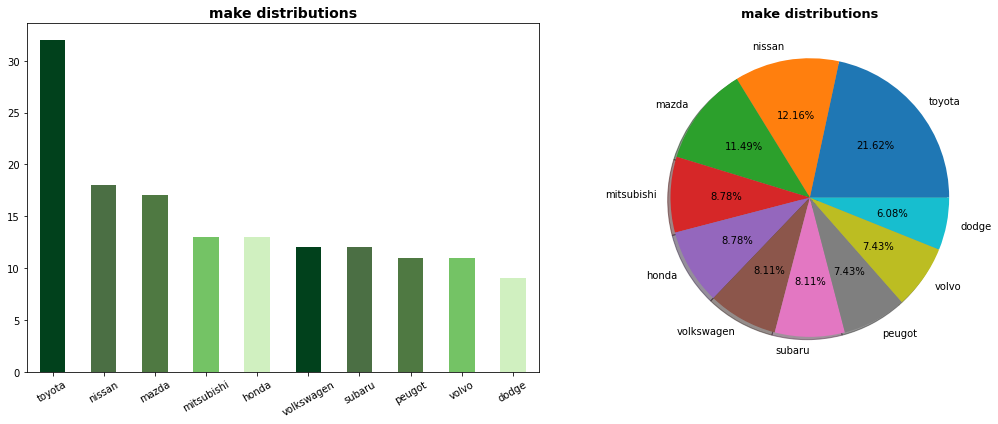

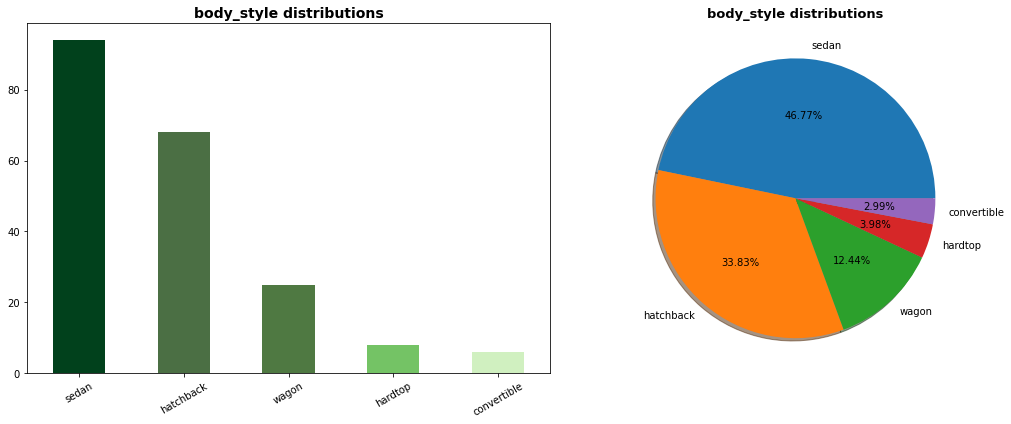

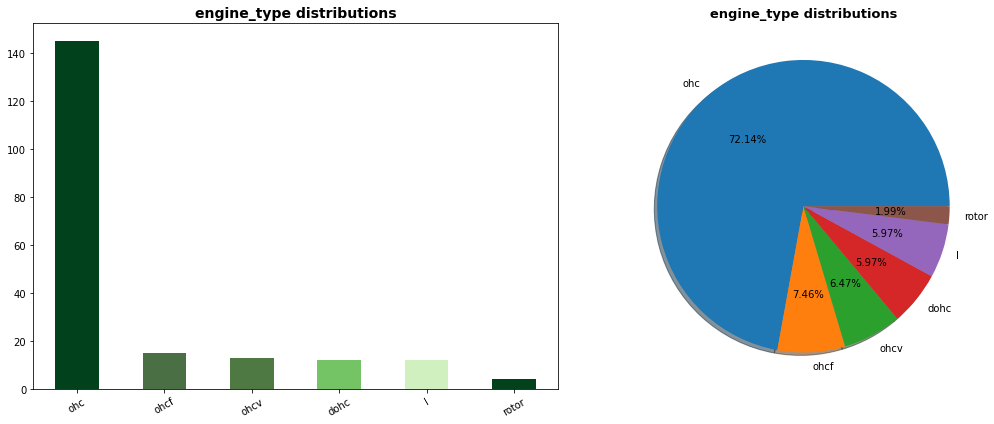

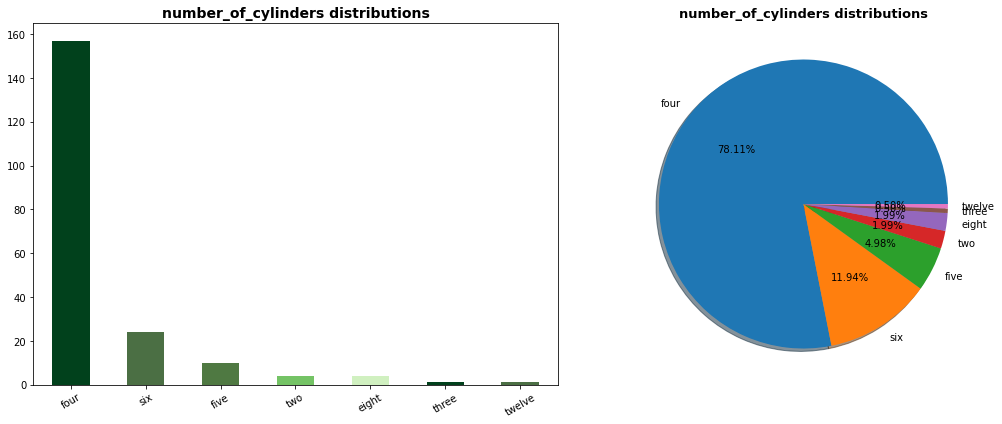

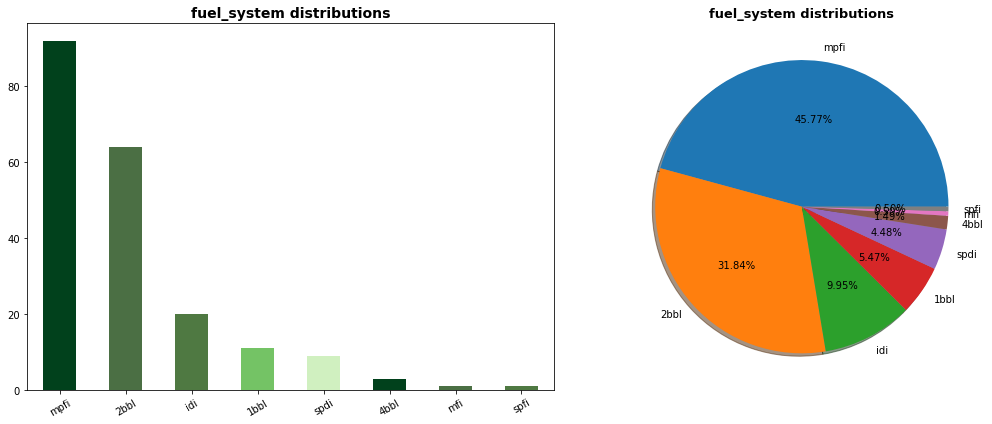

In [620]:
for i in data.columns:
    if((data[i].dtype=='object')&(data[i].nunique()>=4)):
        plt.figure(figsize=(15,6))
        plt.subplot(121)
        plt.title('{} distributions'.format(i),weight='bold',size=14)
        data[i].value_counts()[0:10].plot.bar(color=colors_green)
        plt.xticks(rotation=30)
        
        plt.subplot(122)
        plt.title('{} distributions'.format(i),weight='bold',size=13)
        data[i].value_counts()[0:10].plot.pie(autopct='%.2f%%',shadow=True,labeldistance=1.099)
        plt.ylabel('')
        plt.tight_layout()   

### Unique values in columns

In [621]:
for i in data.columns:
        print(i)
        print( data[i].unique())

symboling
[ 3  1  2  0 -1 -2]
normalized_losses
[168 164 161 158 192 188 149 121  98  81 118 148 110 145 137 101  78 106
  85 107 115 104 113 150 129 119 105  93 122 142 140 153 139 125 128 103
 108 194 231 154  74 141 186  83 102  89  87  77  91 134  65 197  90 133
  94 256 132  95]
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type
['gas' 'diesel']
aspiration
['std' 'turbo']
number_of_doors
['two' 'four']
body_style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels
['rwd' 'fwd' '4wd']
engine_location
['front' 'rear']
wheel_base
[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7 115.6
  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9
 114.2 108.   89.5  96.1  99.1  93.3  97.   9

### Null values 

In [622]:
data.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

# Numerical Data Distributions

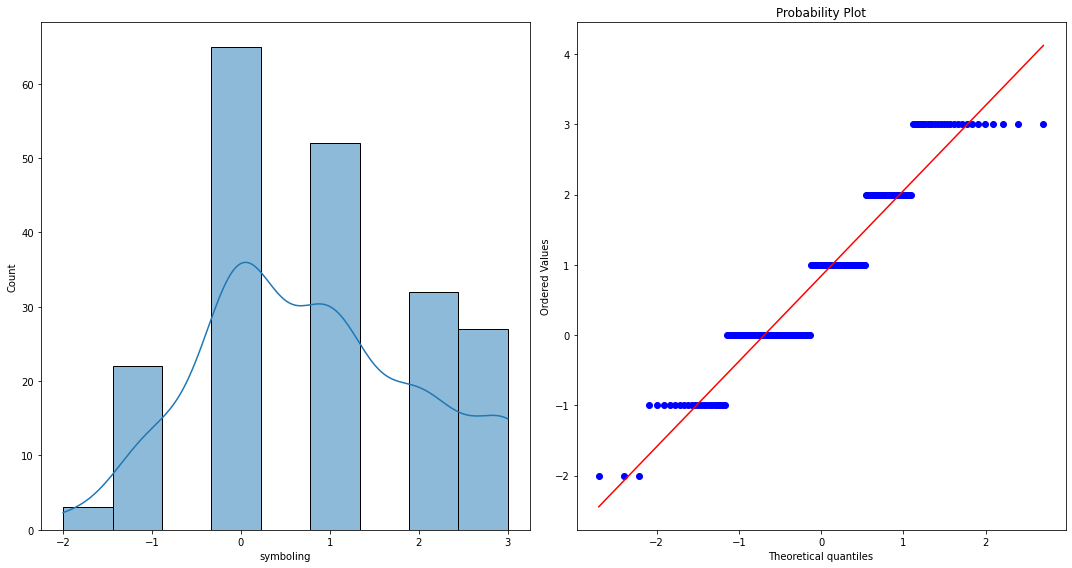

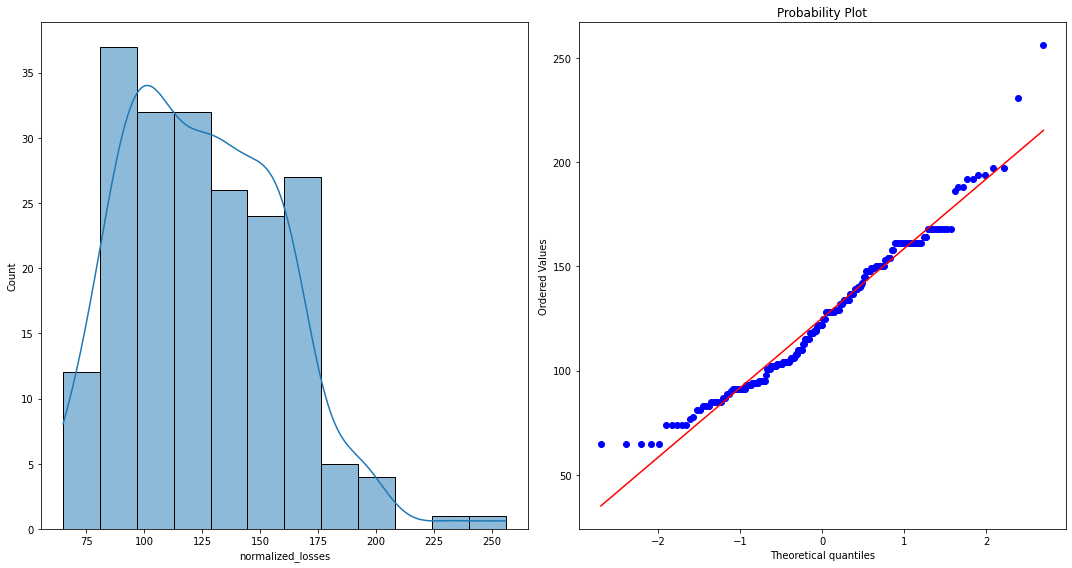

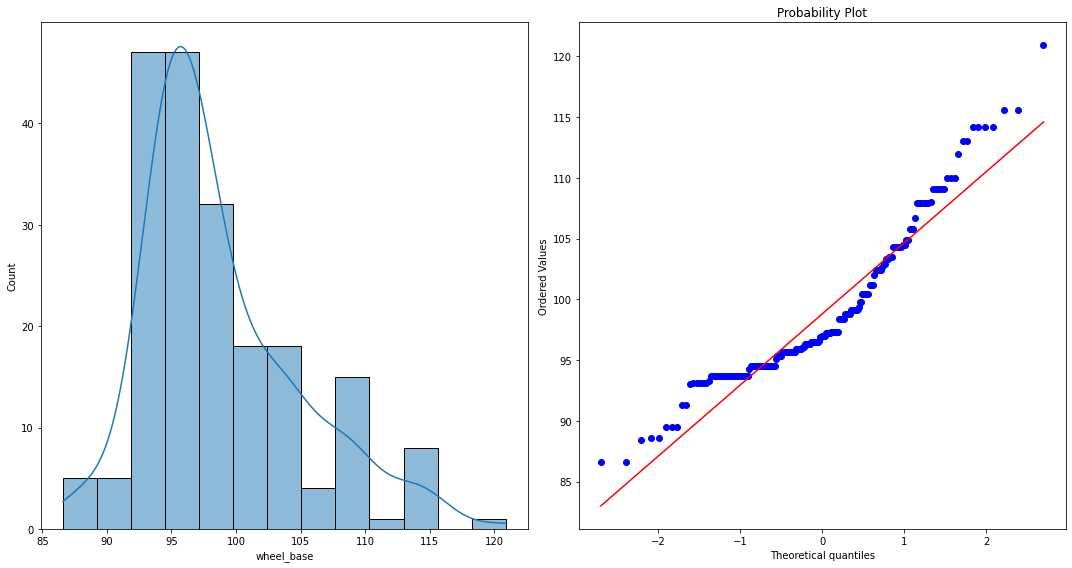

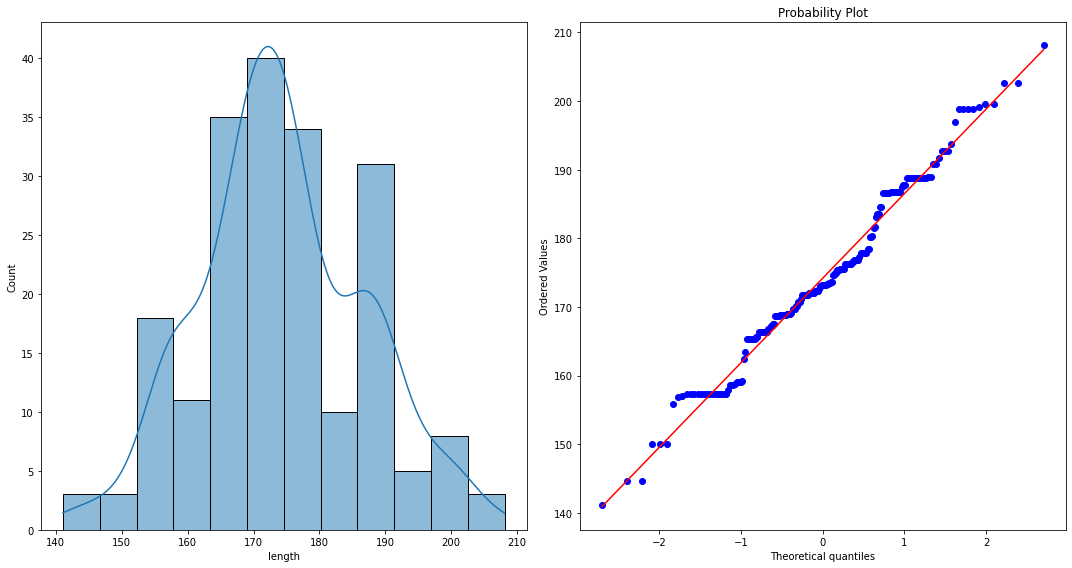

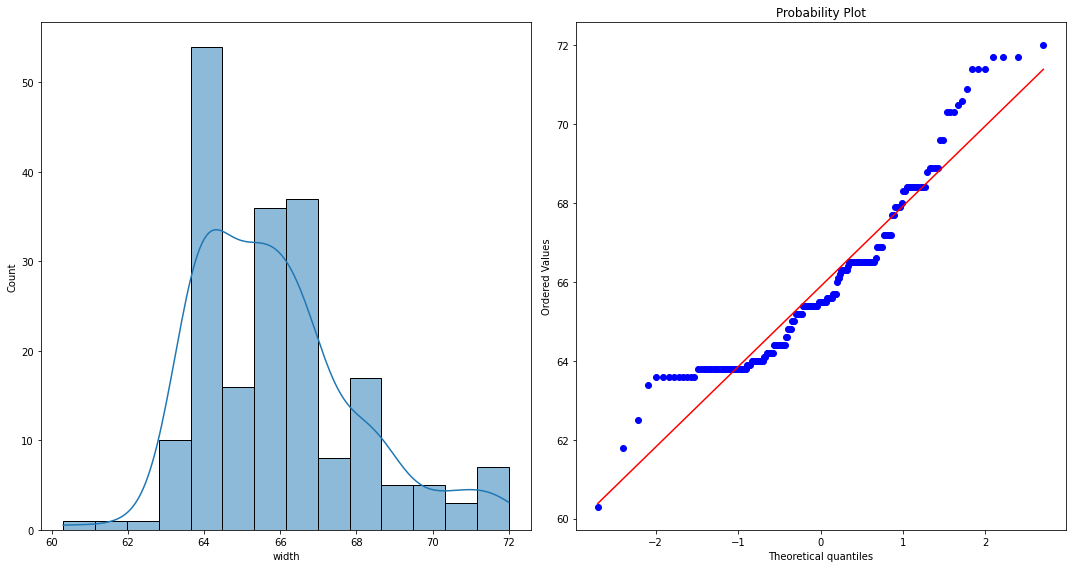

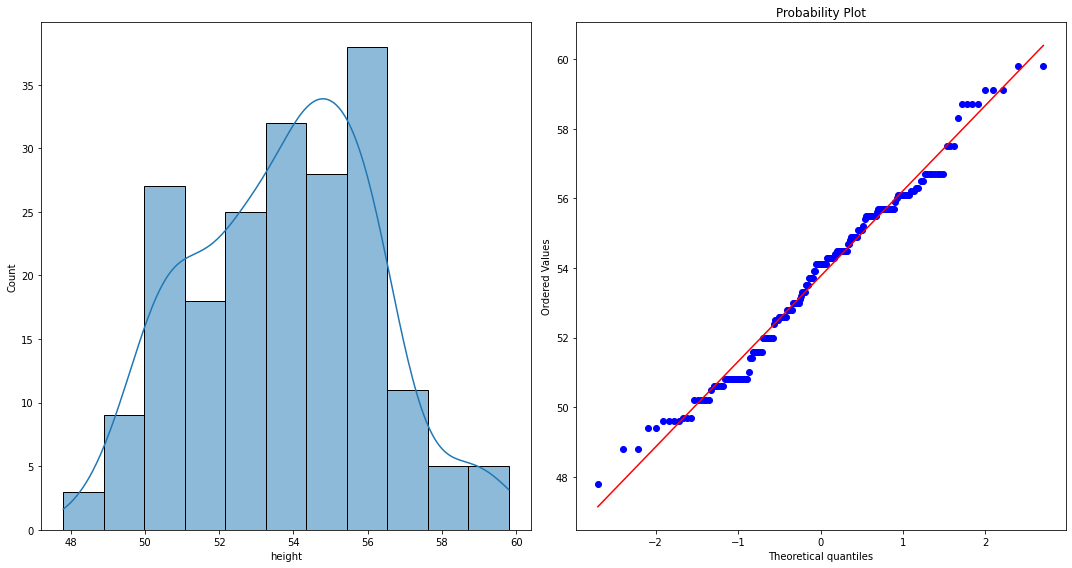

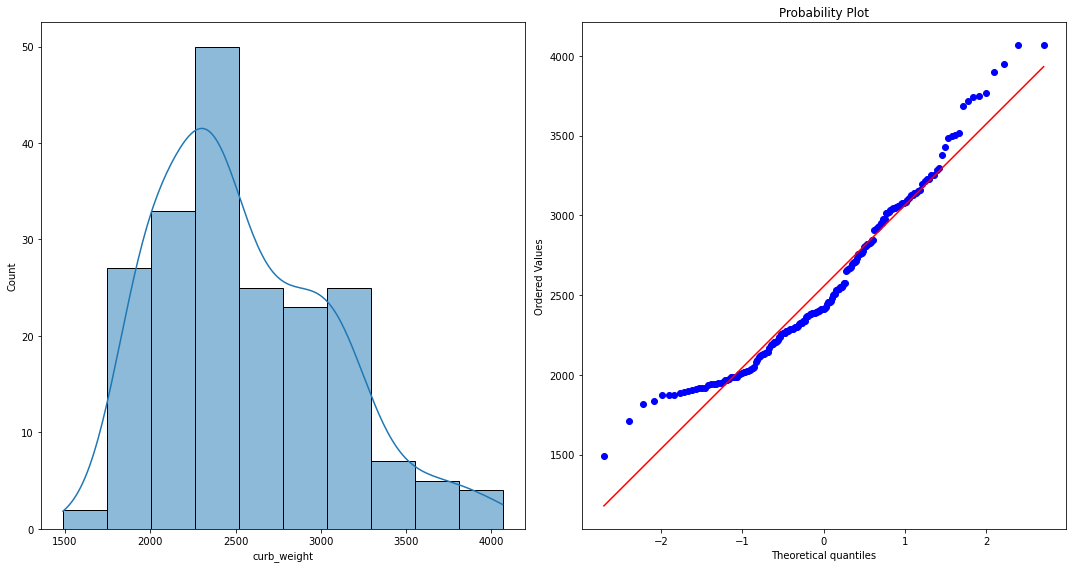

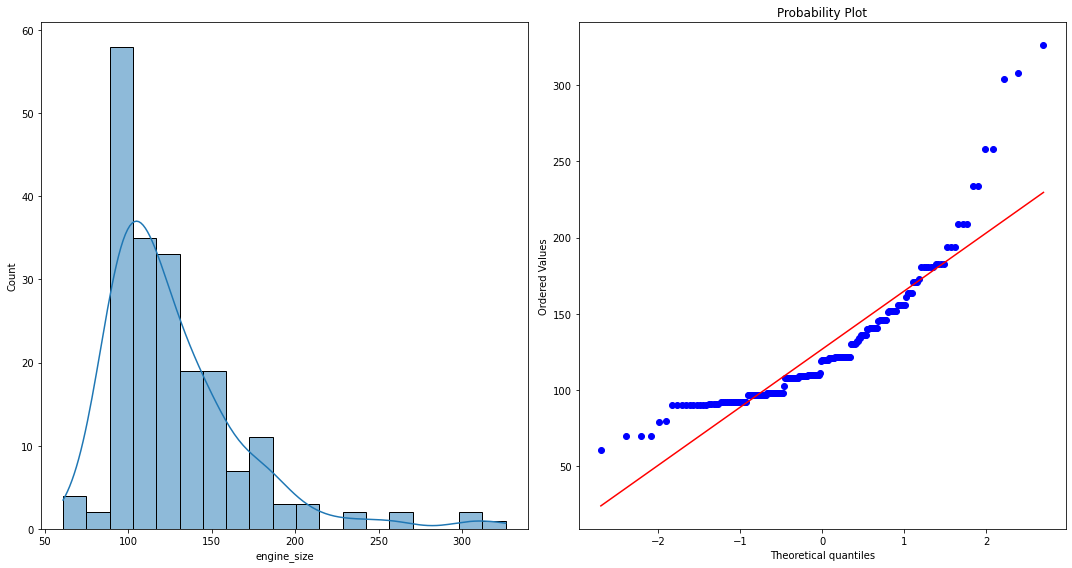

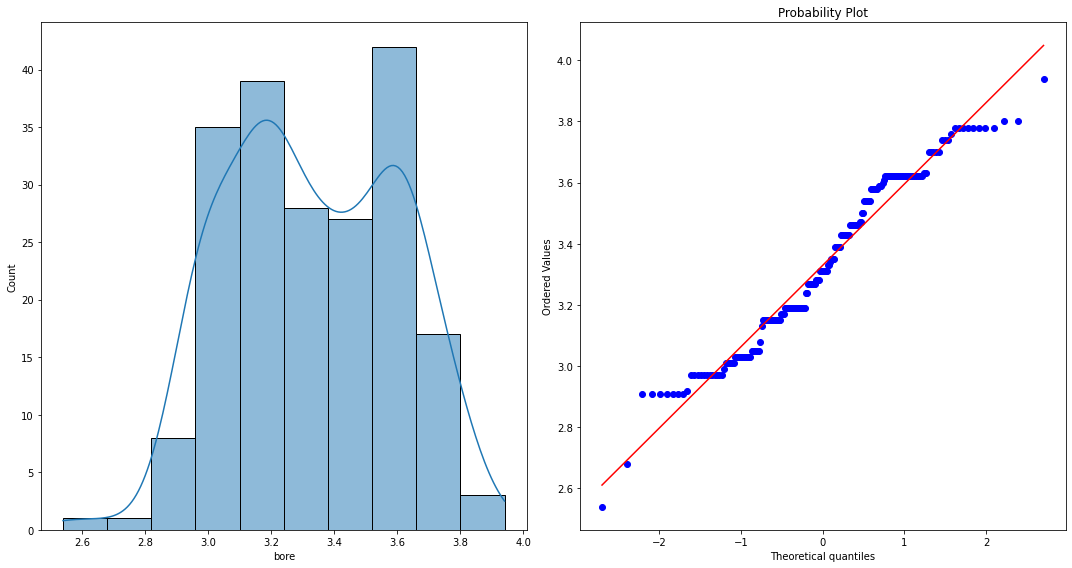

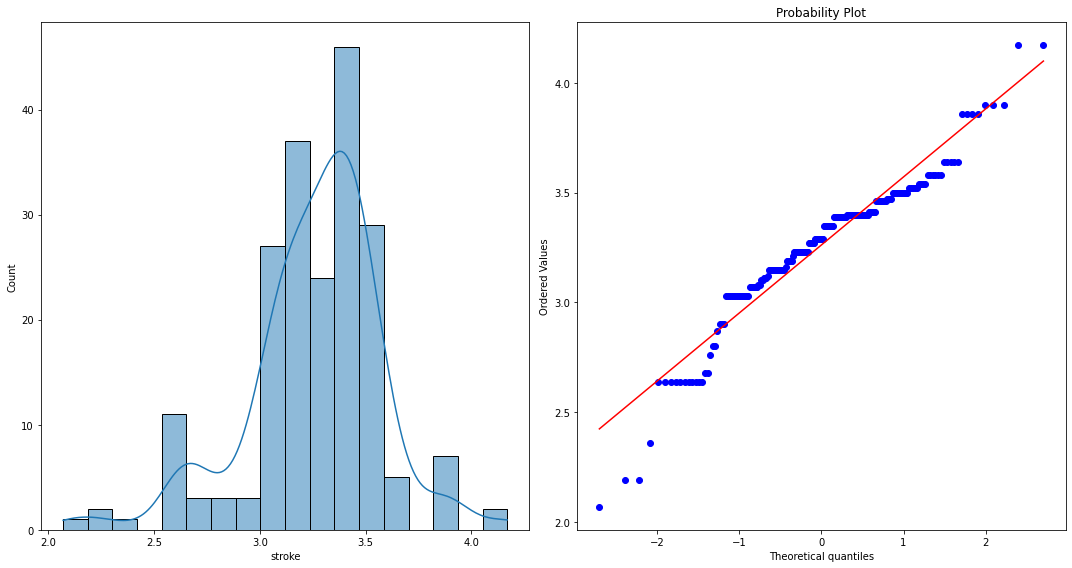

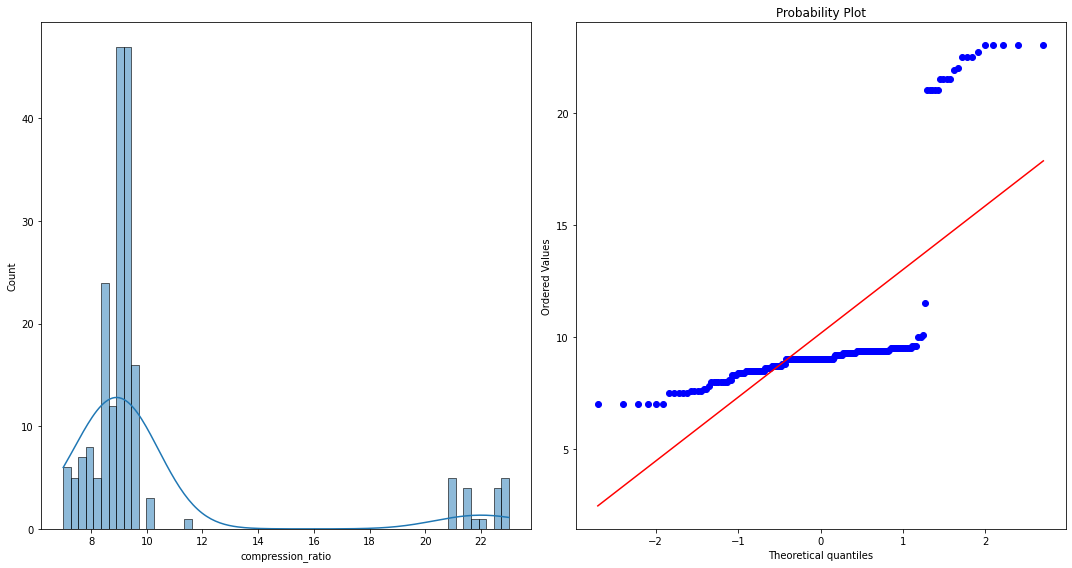

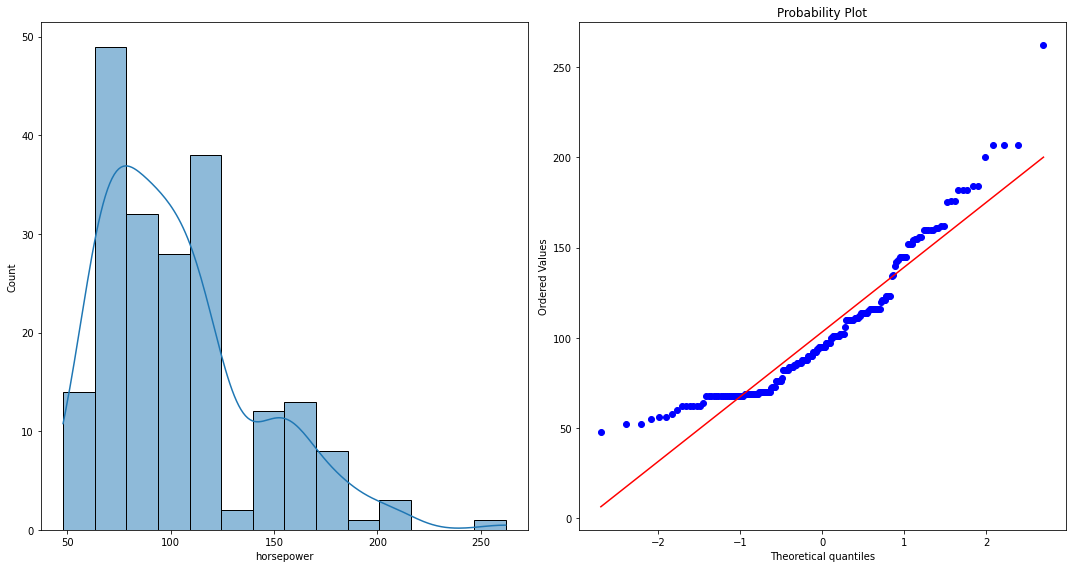

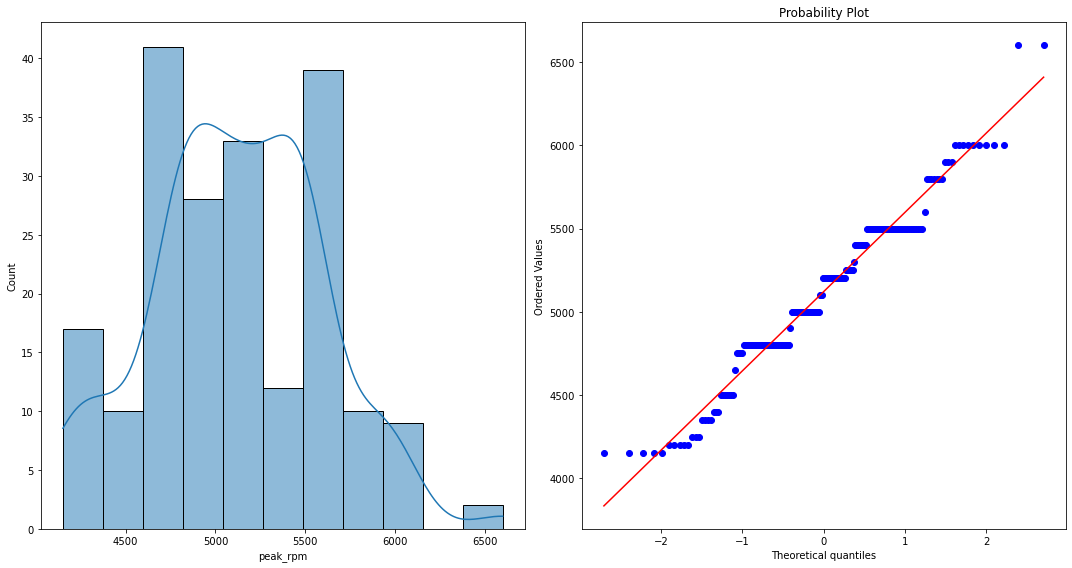

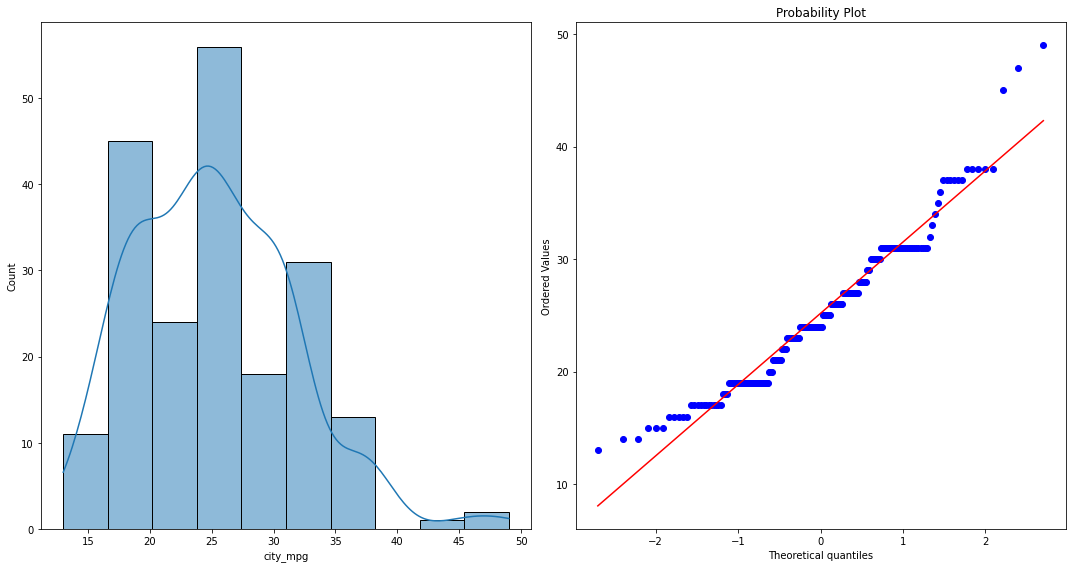

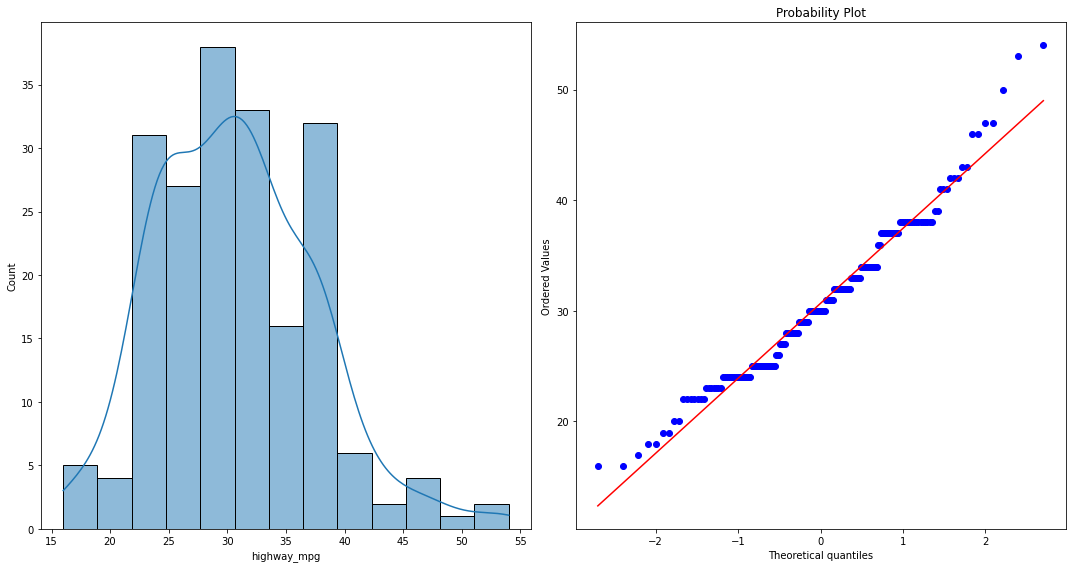

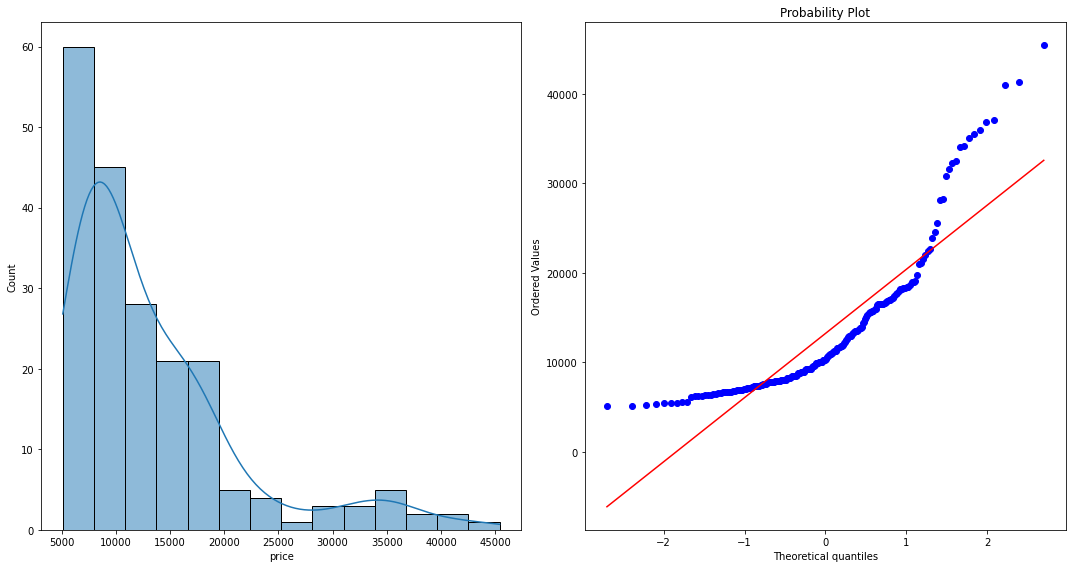

In [623]:
for i in data.columns:
    if(data[i].dtype!='object'):
        plt.figure(figsize=(15,8))
        plt.subplot(121)
        sns.histplot(data=data,x=i,kde=True)
        
        plt.subplot(122)
        stats.probplot(data[i],dist='norm',plot=plt)
        plt.tight_layout() 

#####  -Most of them don't follow gaussian distribution and some has outliers in them.

# Numeric datas against price feature

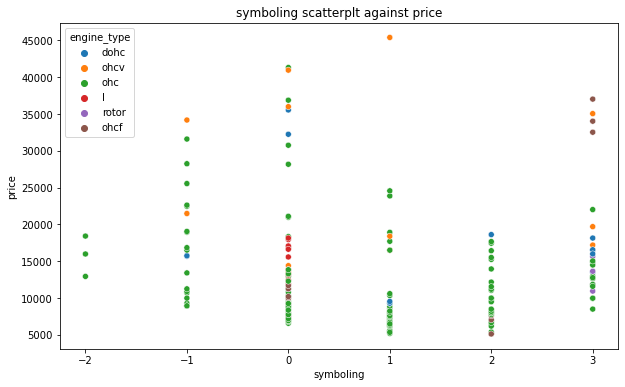

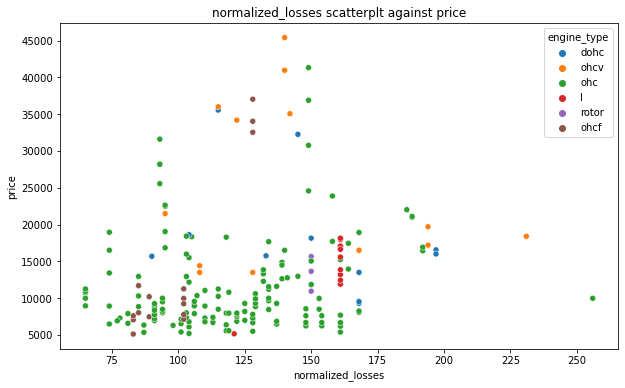

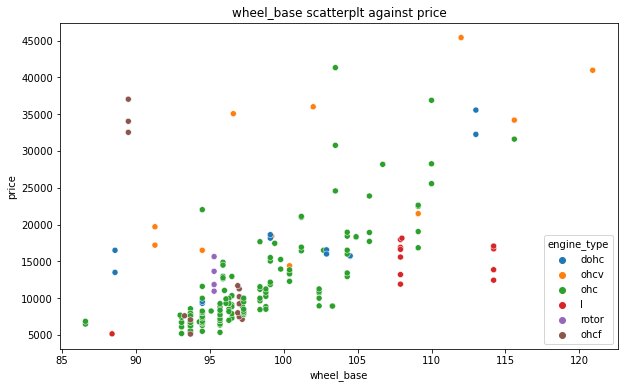

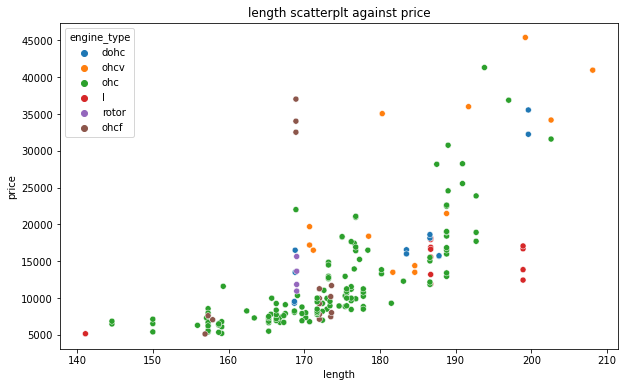

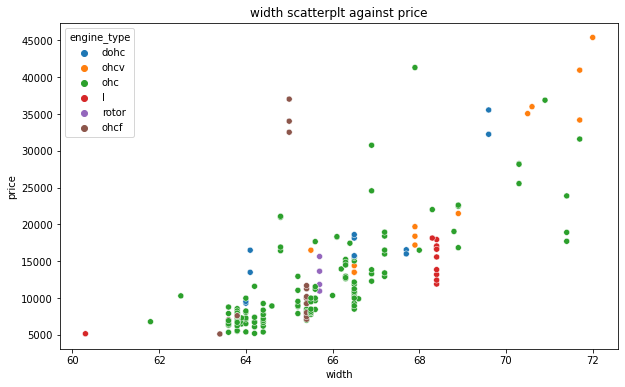

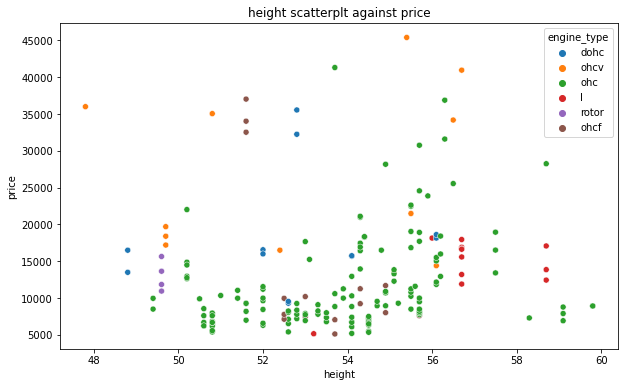

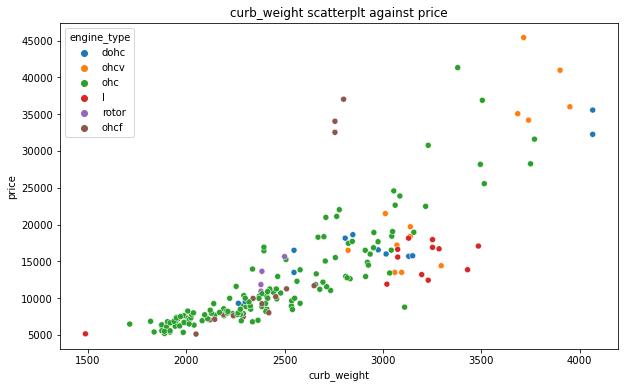

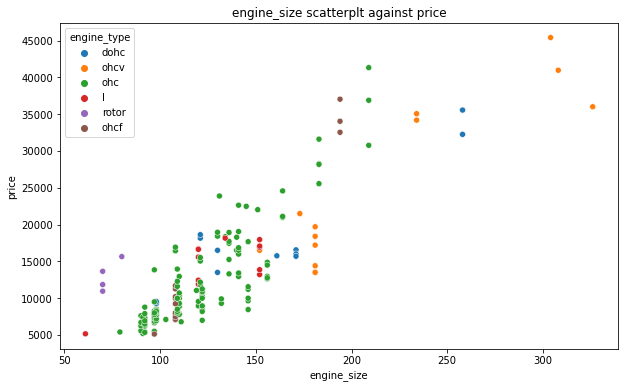

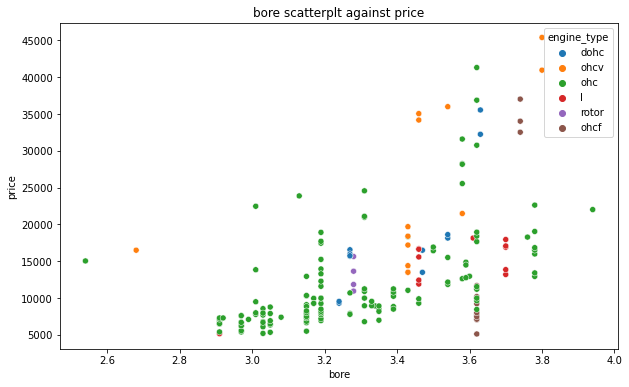

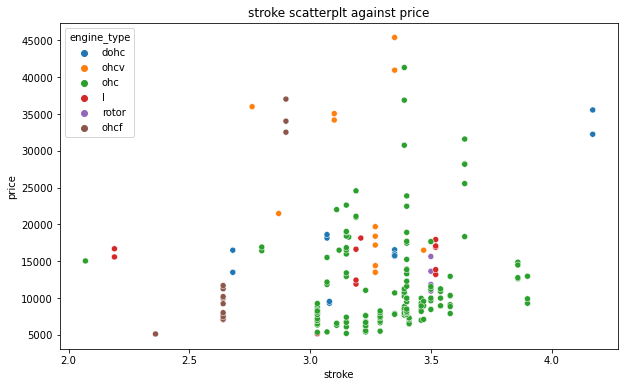

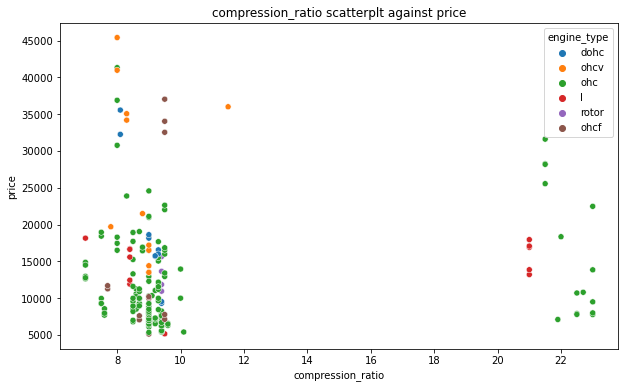

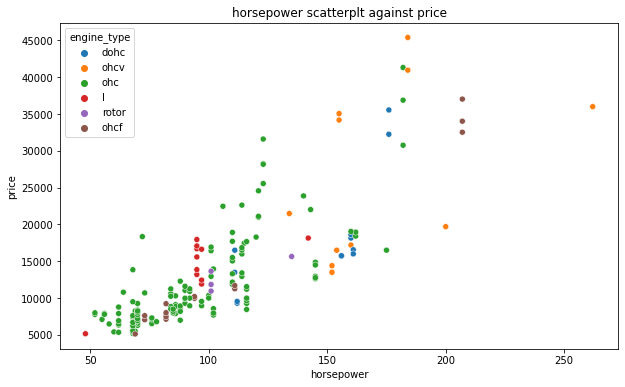

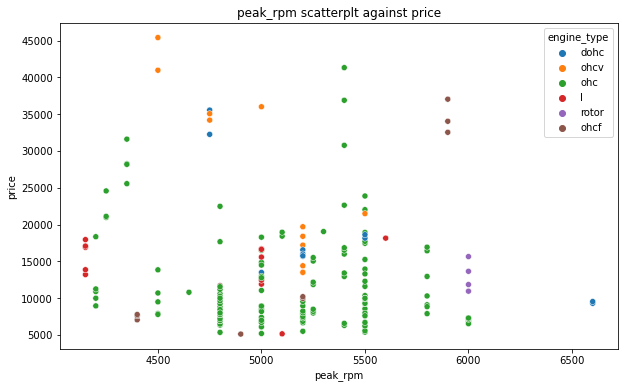

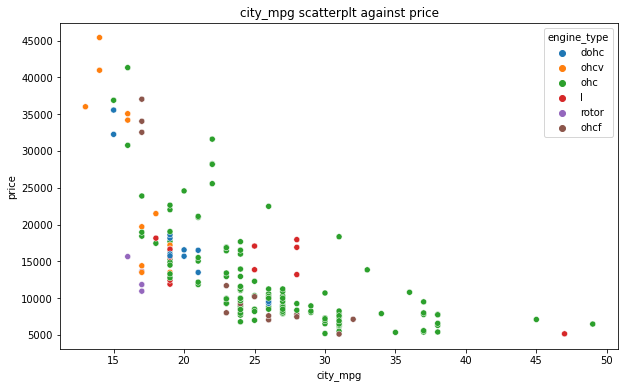

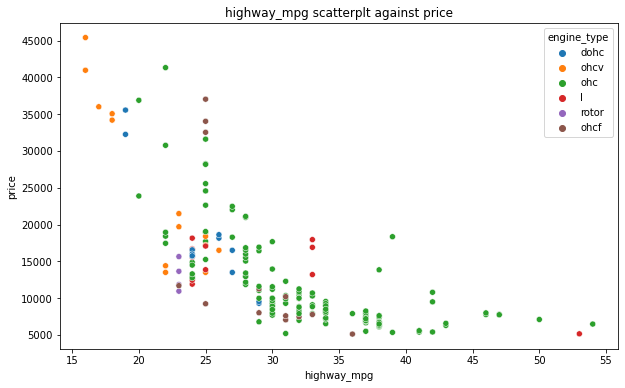

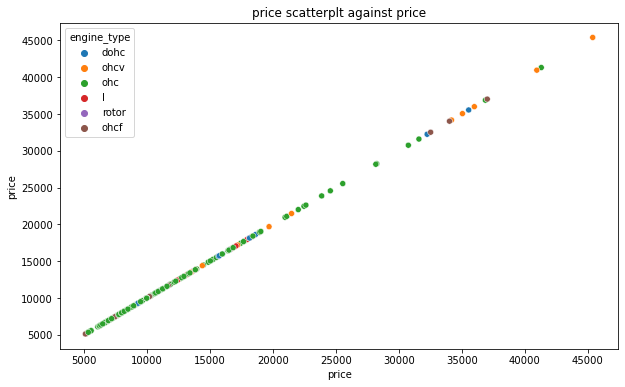

In [624]:
for i in data.columns:
    if(data[i].dtype!='object'):
        plt.figure(figsize=(10,6))
        plt.subplot(111)
        plt.title('{} scatterplt against price'.format(i))
        sns.scatterplot(data=data,x=i,y='price',hue='engine_type')

<AxesSubplot:>

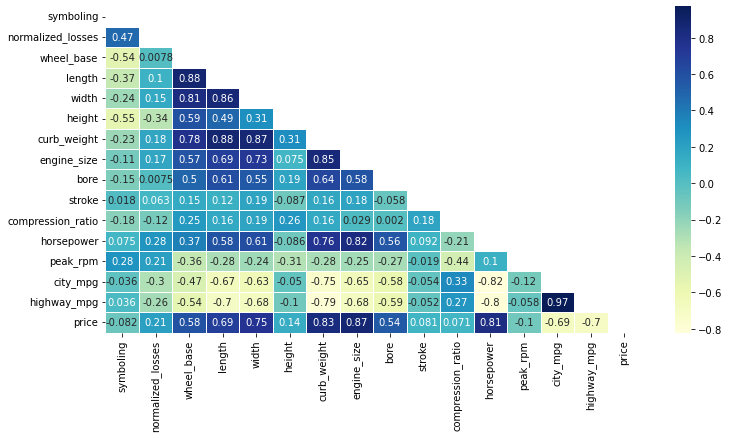

In [625]:
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,linewidth=1,mask=mask)

#### -Some Conclusions

1. Most of the numeric features have positive corelations.
2. Highway_mpg, city_mpg has mostly negative corelations with other.
3. From scatterplots and heatmap, Price will be the most suitable target.
4. Ohc engine_type is widely available in automobiles.

# Feature Engineering 

In [626]:
from sklearn.preprocessing import LabelEncoder
labelencode=LabelEncoder()

In [627]:
for i in data.columns:
    if(data[i].dtype=='object'):
        data[i]=labelencode.fit_transform(data[i])

### Outliers plots

C:\Users\aikik\AppData\Local\Temp\ipykernel_16188\1759344242.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



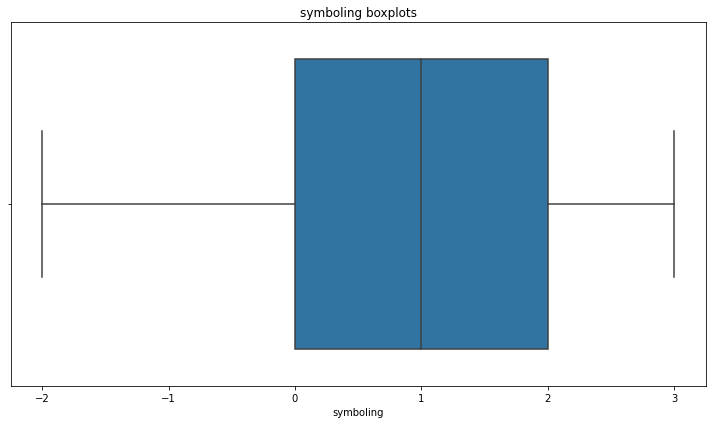

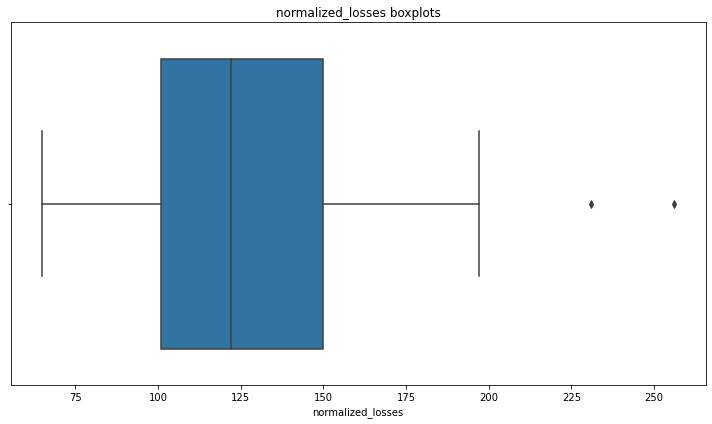

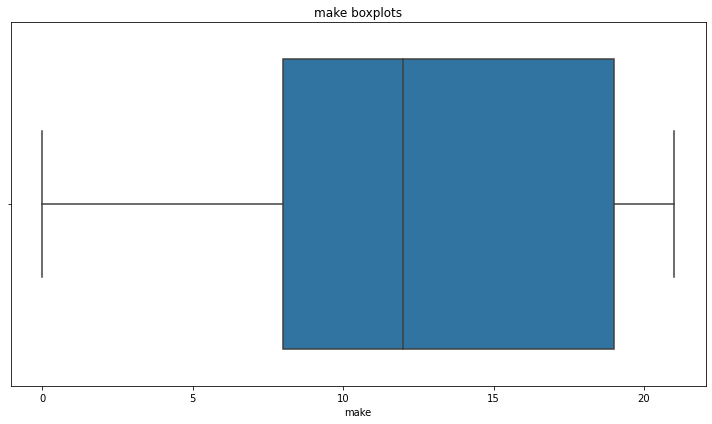

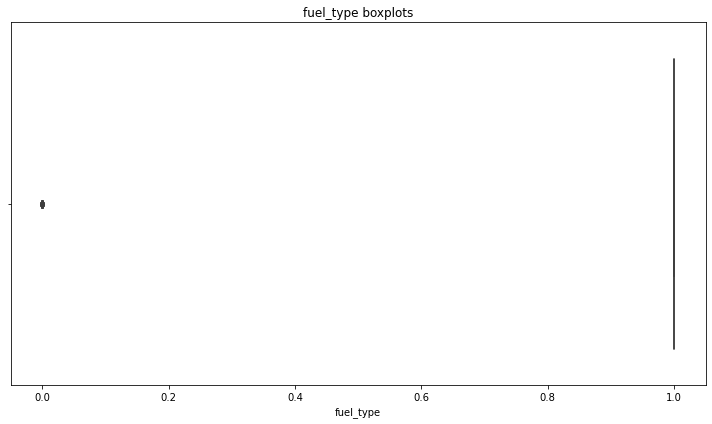

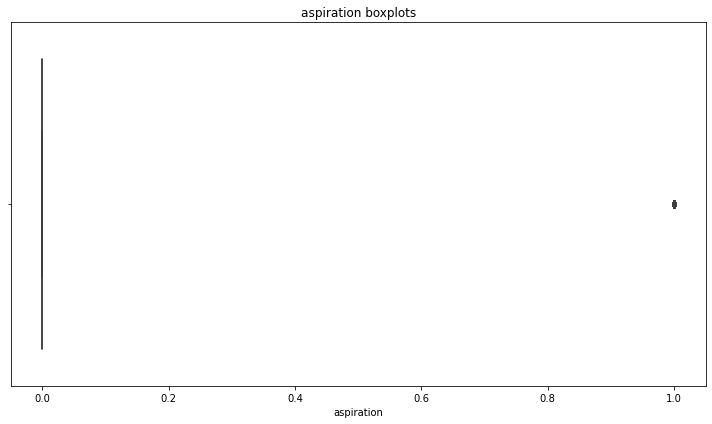

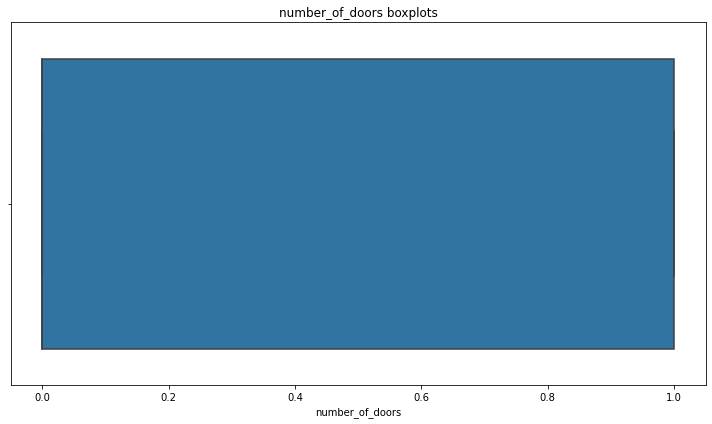

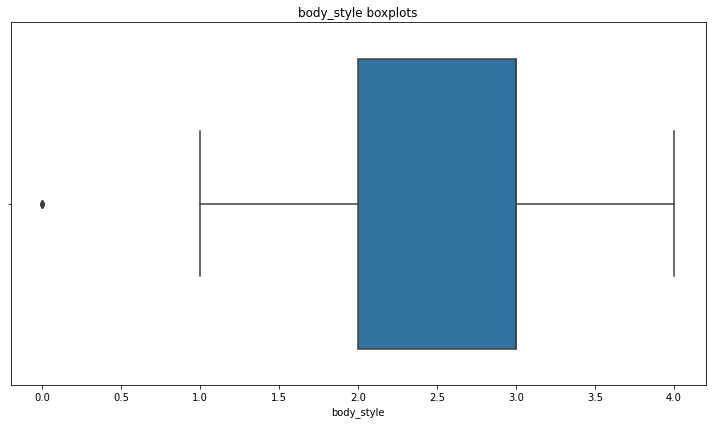

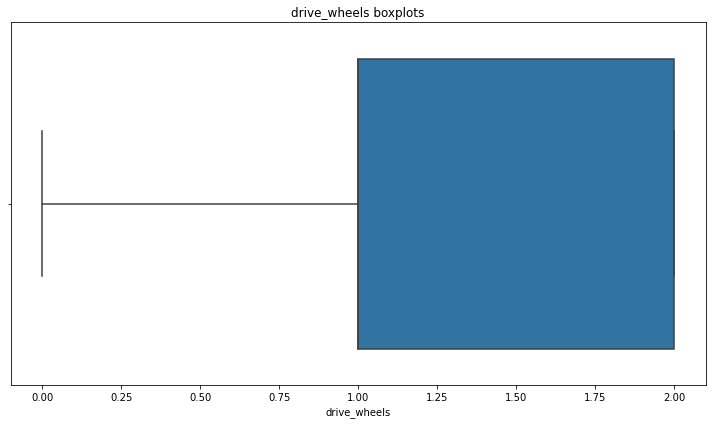

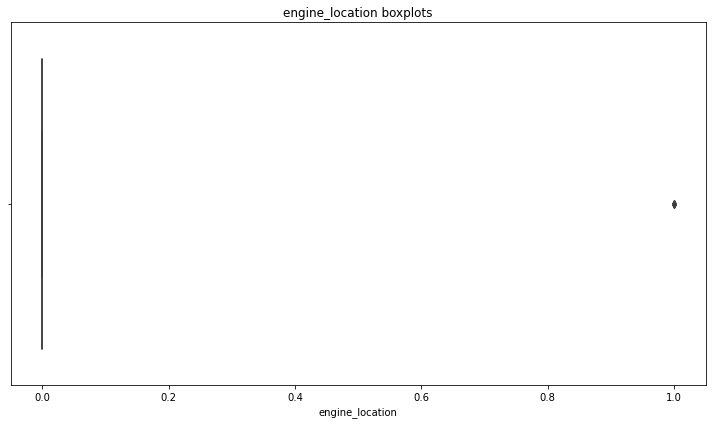

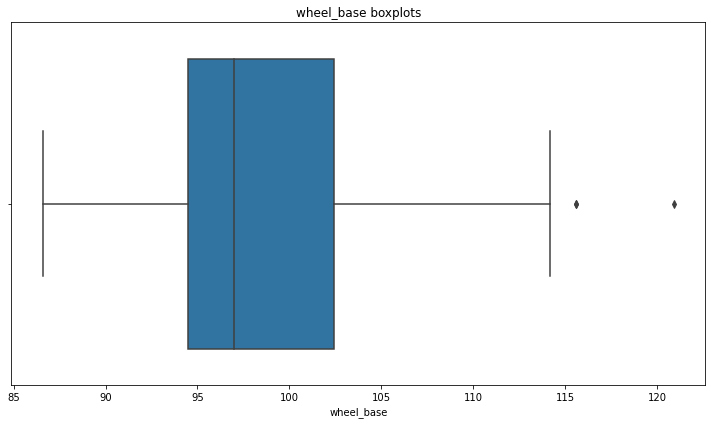

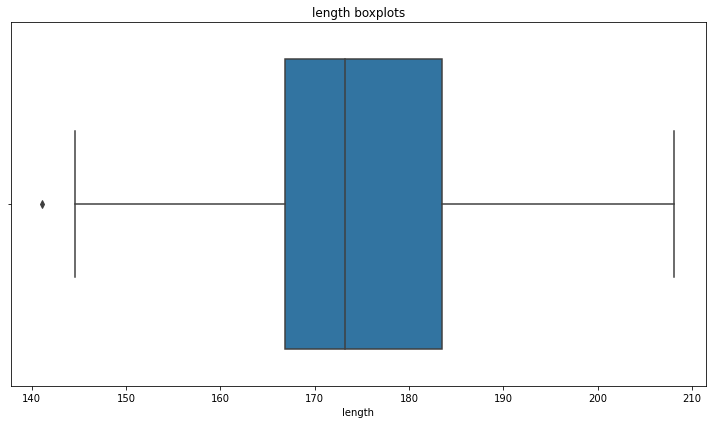

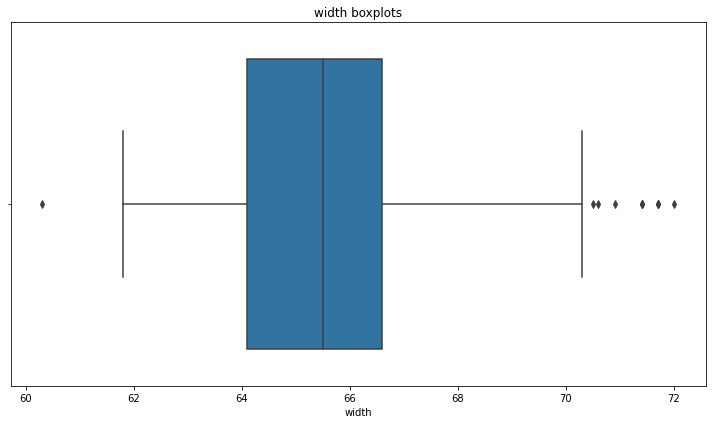

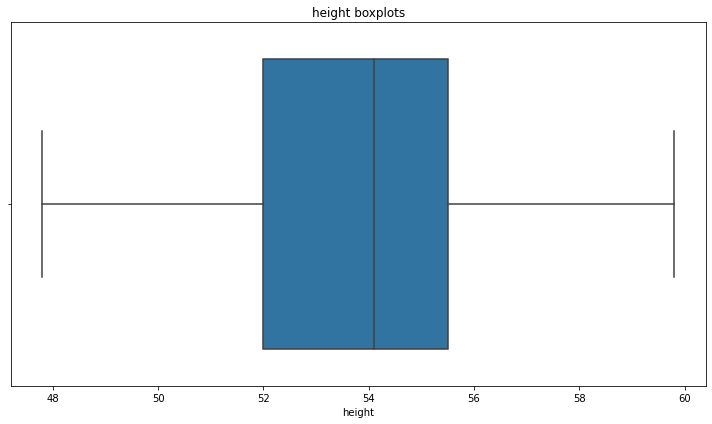

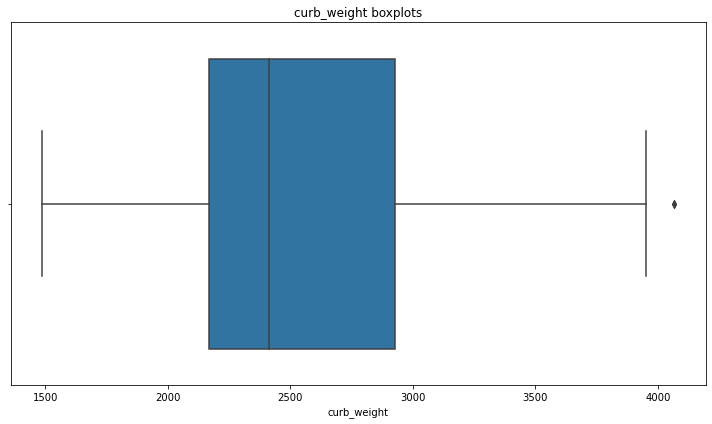

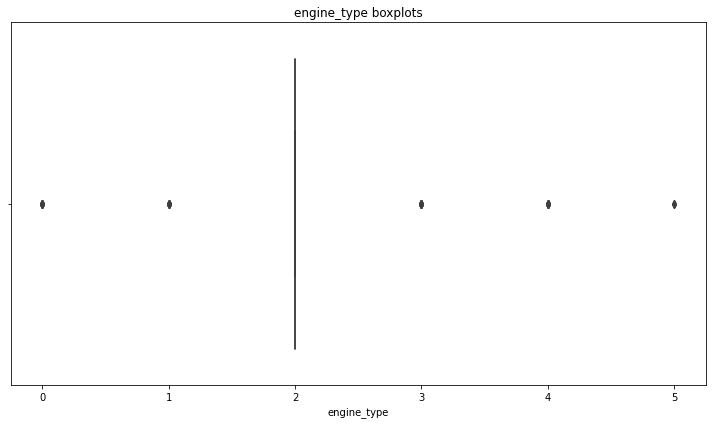

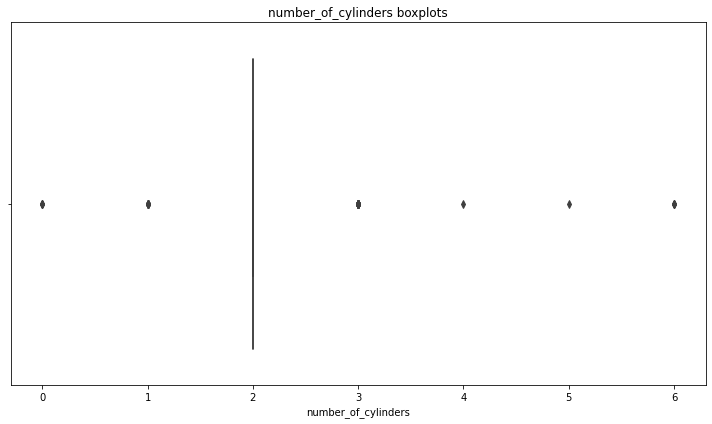

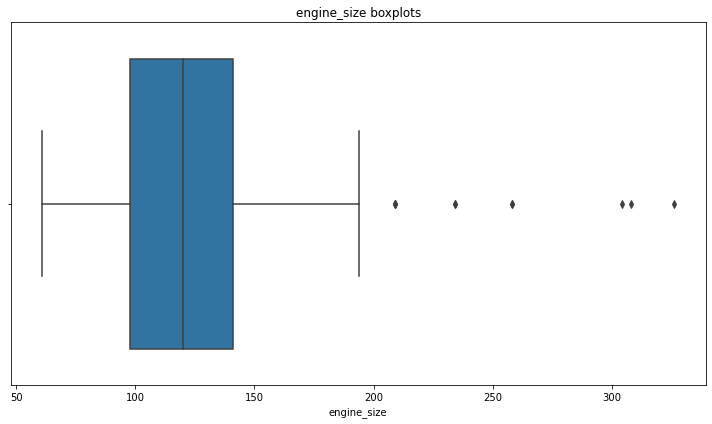

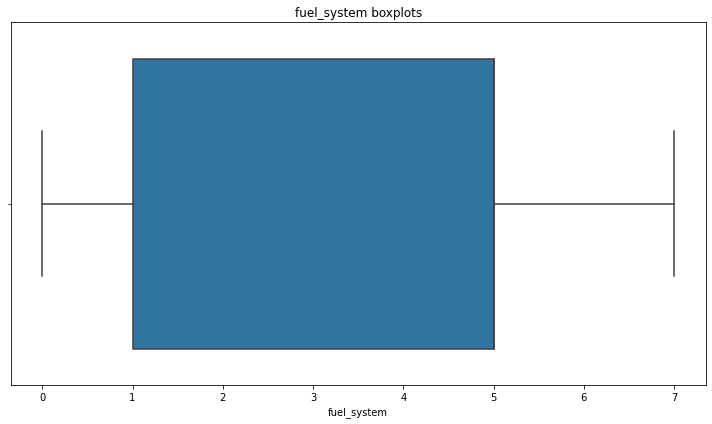

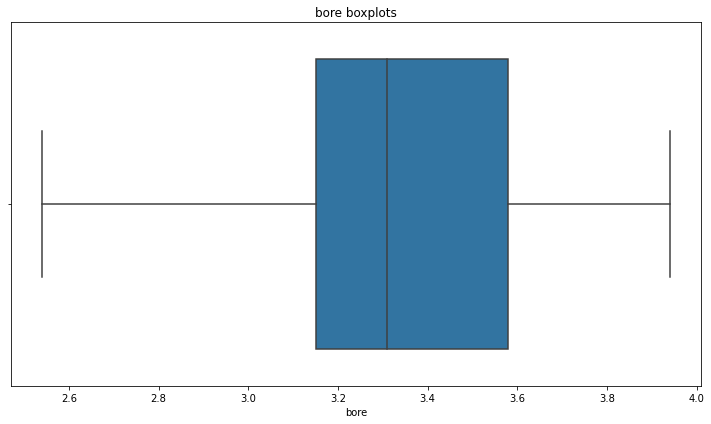

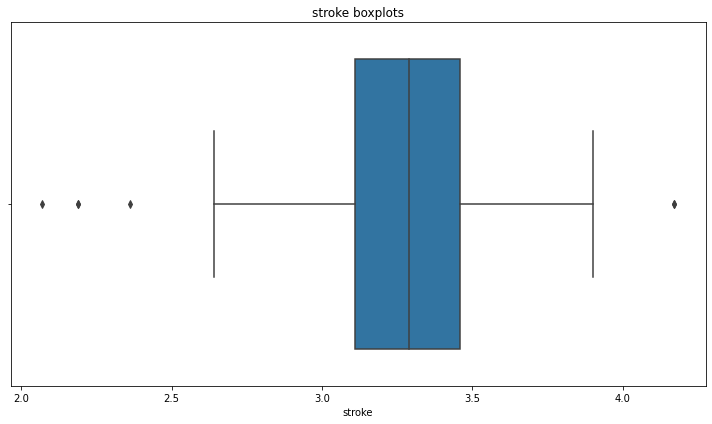

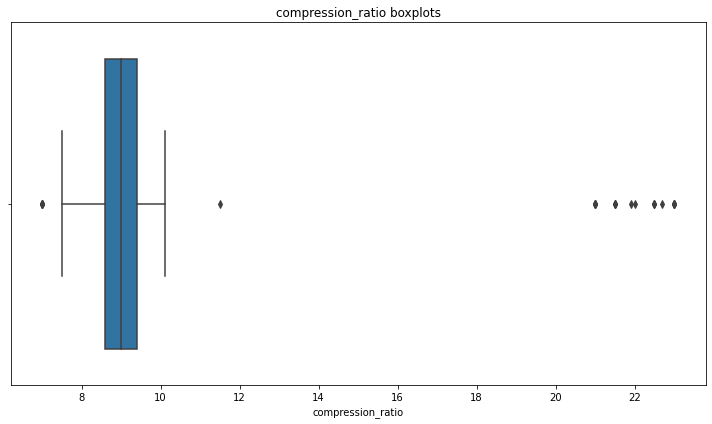

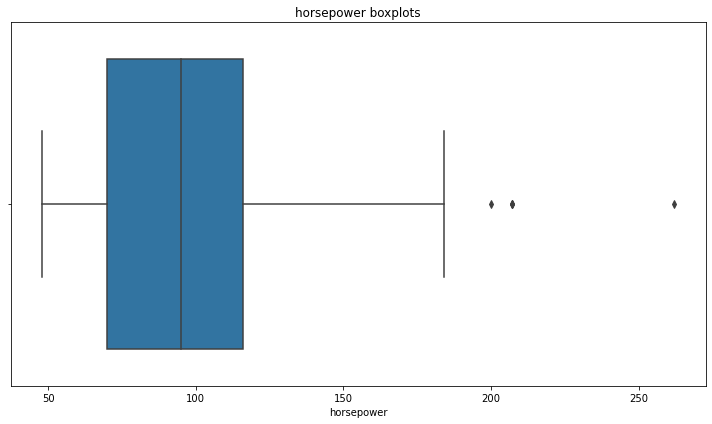

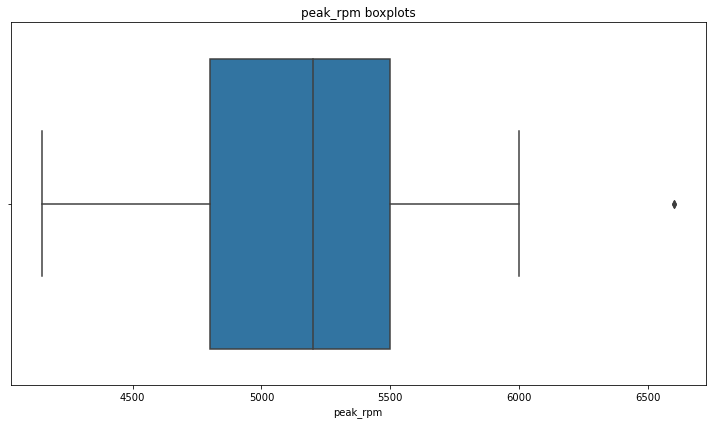

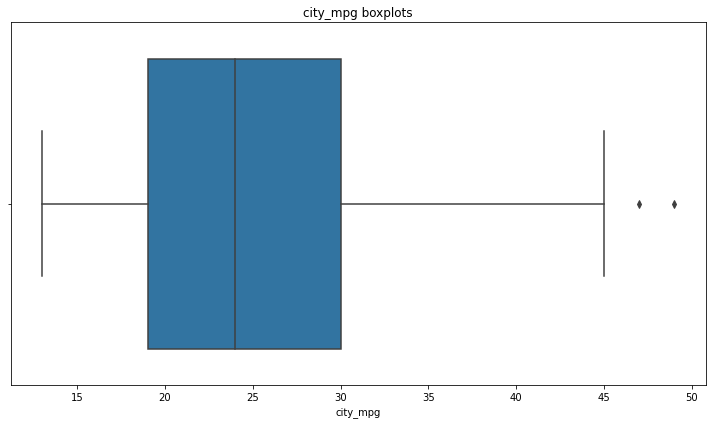

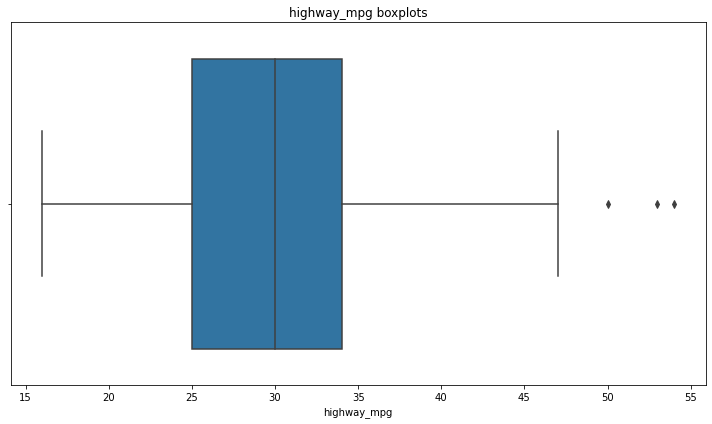

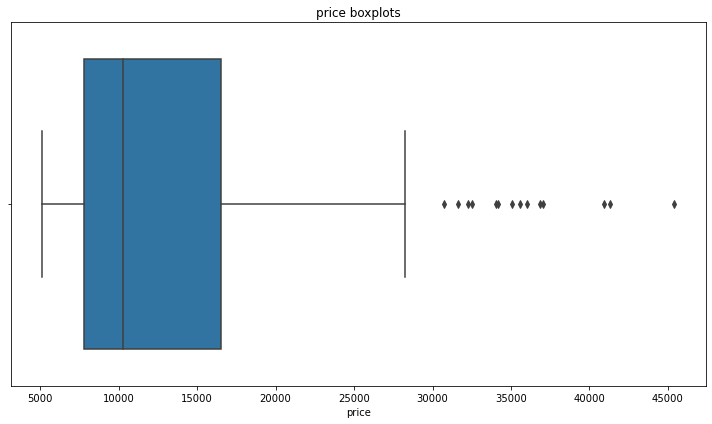

In [628]:
for i in data.columns:
    if(data[i].dtype!='object'):
        plt.figure(figsize=(10,6))
        plt.subplot(111)
        plt.title('{} boxplots'.format(i))
        sns.boxplot(data=data,x=i)
        plt.tight_layout()

In [629]:
for i in data.columns:
    print(i,data[i].skew())

symboling 0.19737036029756264
normalized_losses 0.5513515774624659
make -0.2639886362035902
fuel_type -2.6960723403217095
aspiration 1.6863838635859196
number_of_doors 0.2731565773124672
body_style -0.6711134241499194
drive_wheels -0.03358847370545811
engine_location 8.061230492758208
wheel_base 1.0312614426719533
length 0.15444635183586677
width 0.8750290419412816
height 0.029173299149270183
curb_weight 0.7058035875297635
engine_type 0.5417541234742397
number_of_cylinders 2.3223788206220917
engine_size 1.9791441966363523
fuel_system -0.24794762827412892
bore -0.021644941857333216
stroke -0.7257486843671132
compression_ratio 2.5844624326120726
horsepower 1.1553715777806066
peak_rpm 0.08832001943634737
city_mpg 0.6804334707346078
highway_mpg 0.5495071459179158
price 1.8096753390980749


### Feature Transformation

C:\Users\aikik\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\aikik\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\aikik\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning:

invalid value encountered in subtract

C:\Users\aikik\anaconda3\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning:

invalid value encountered in subtract

C:\Users\aikik\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\aikik\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\aikik\AppData\Local\Temp\ipykernel_16188\2393319735.py:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained unti

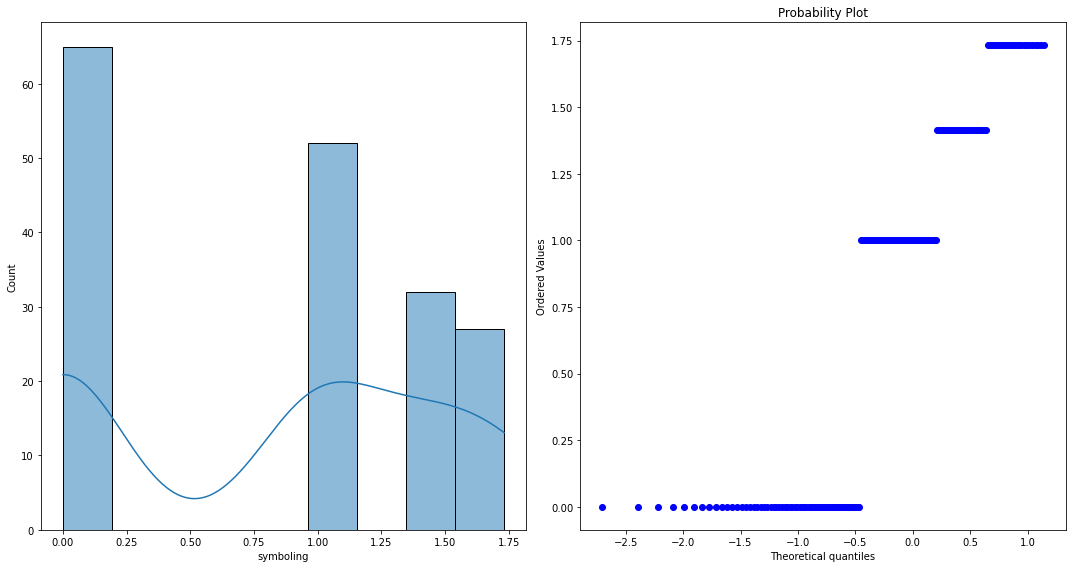

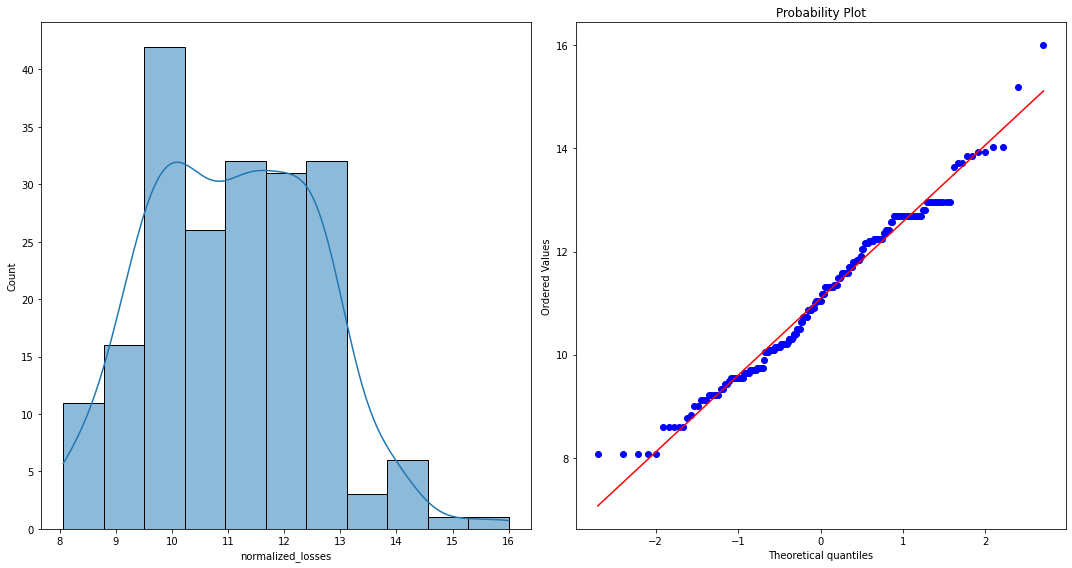

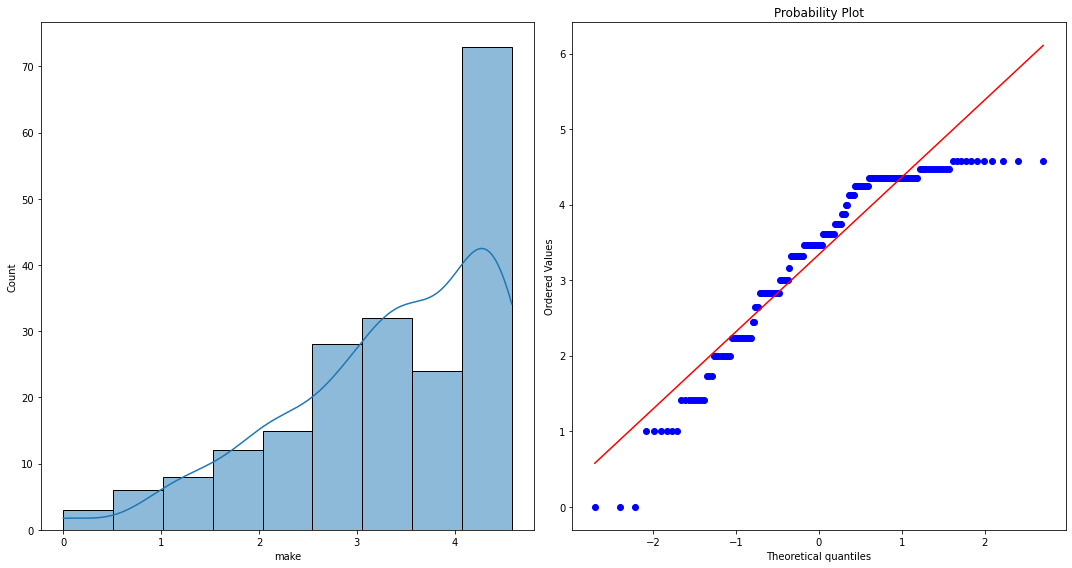

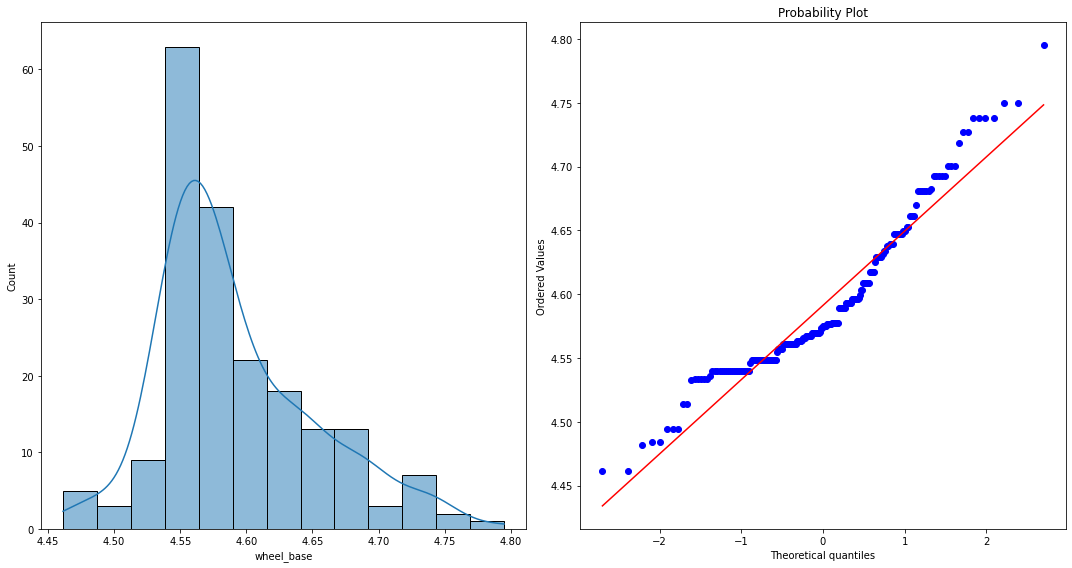

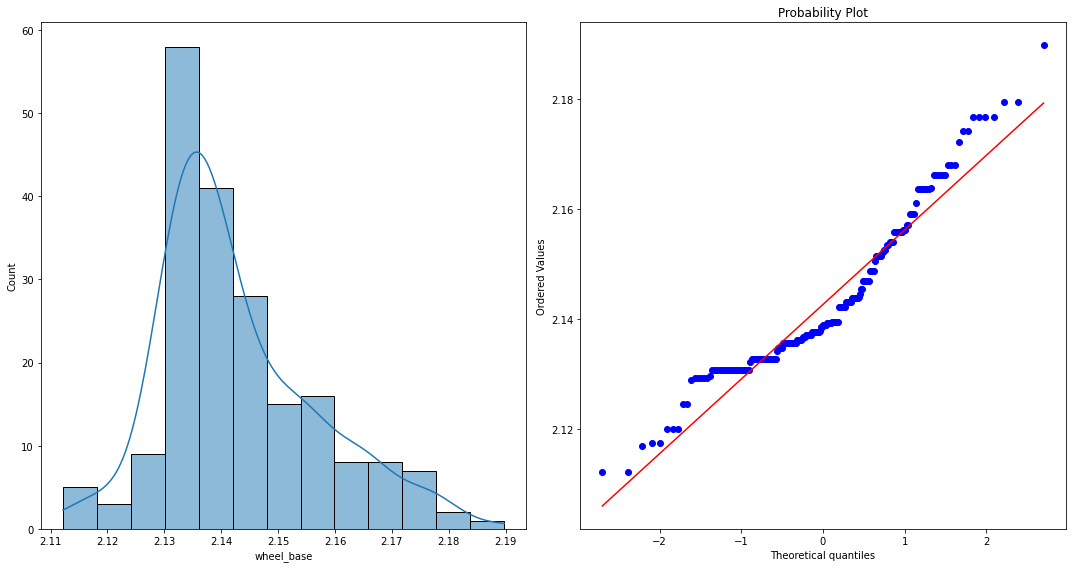

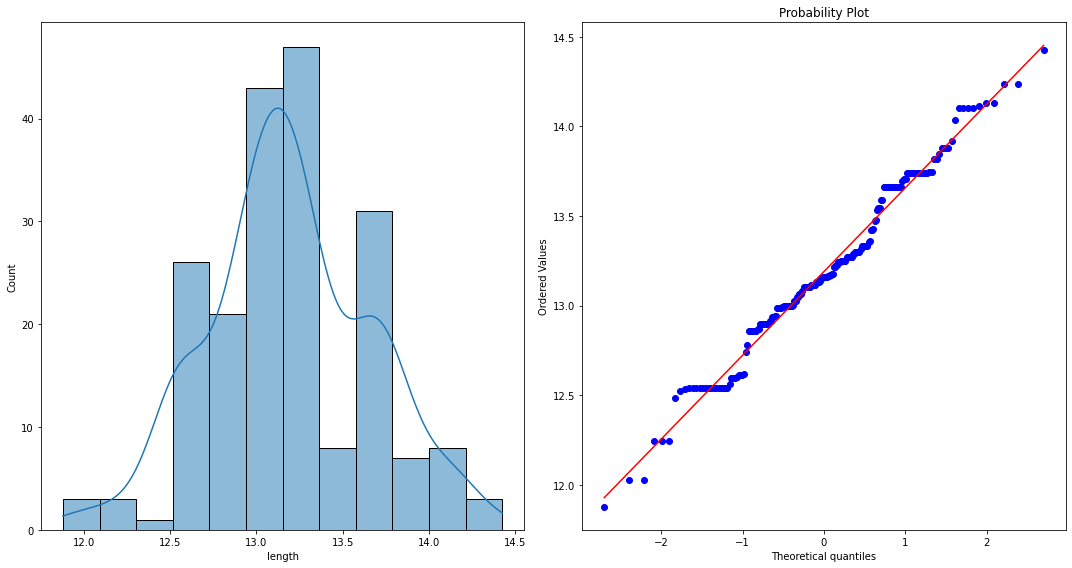

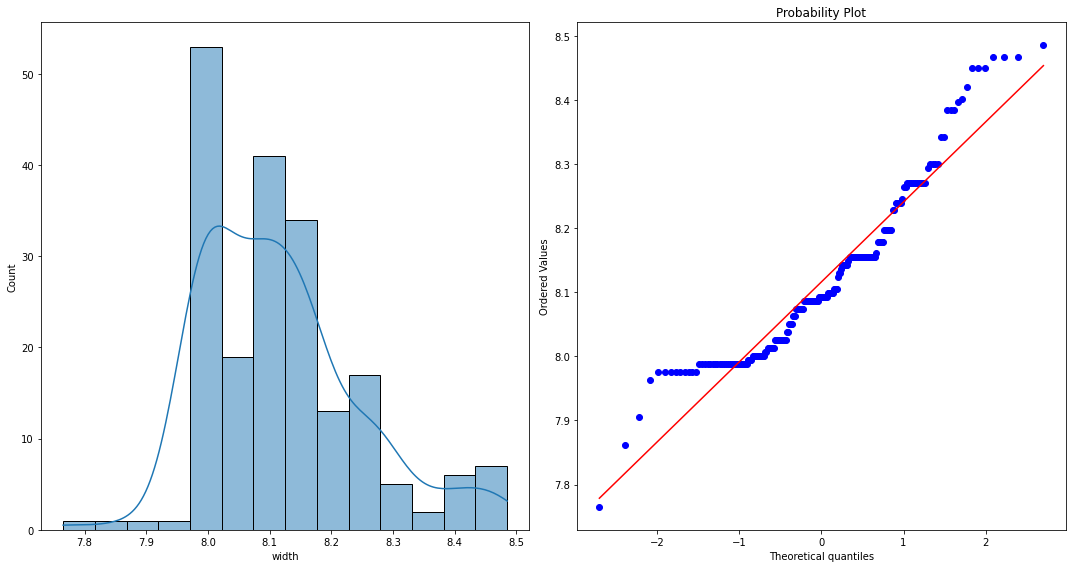

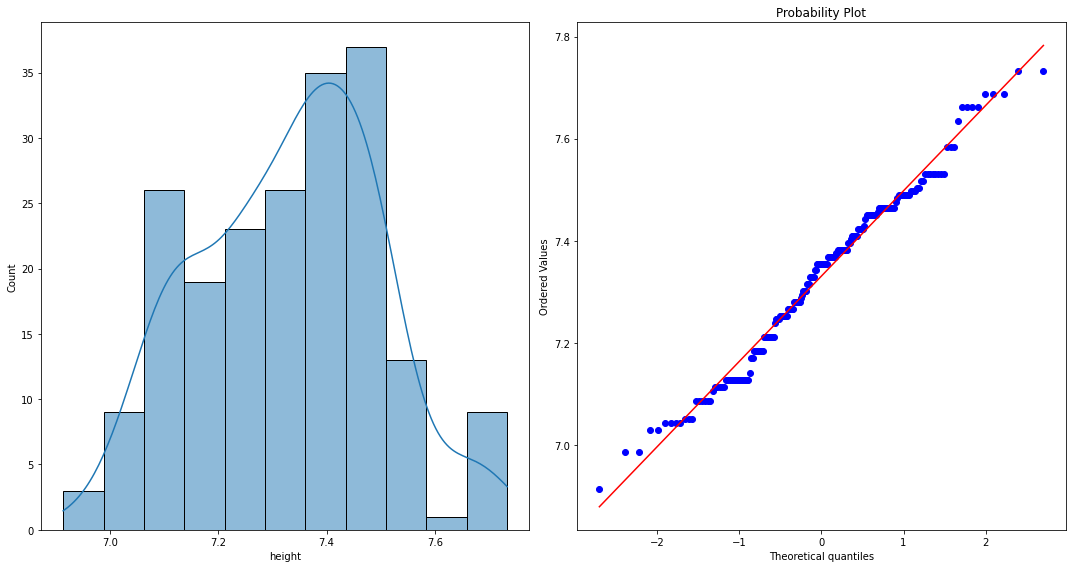

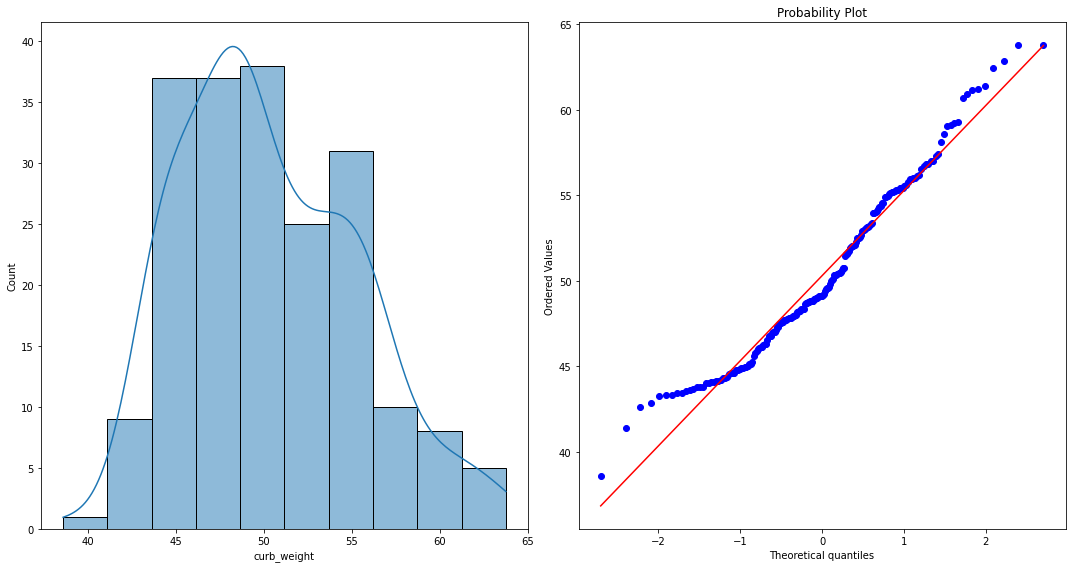

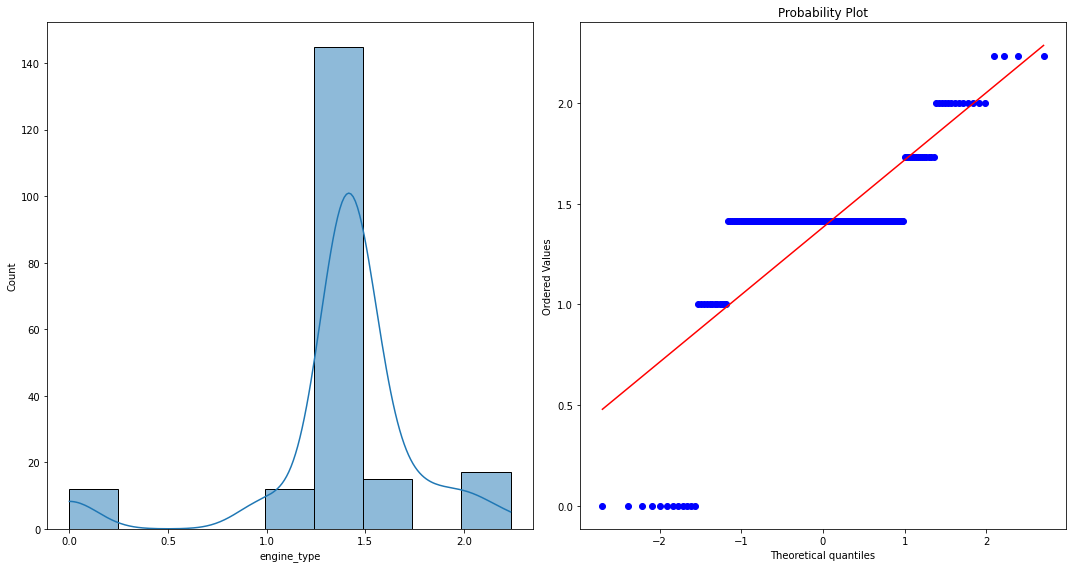

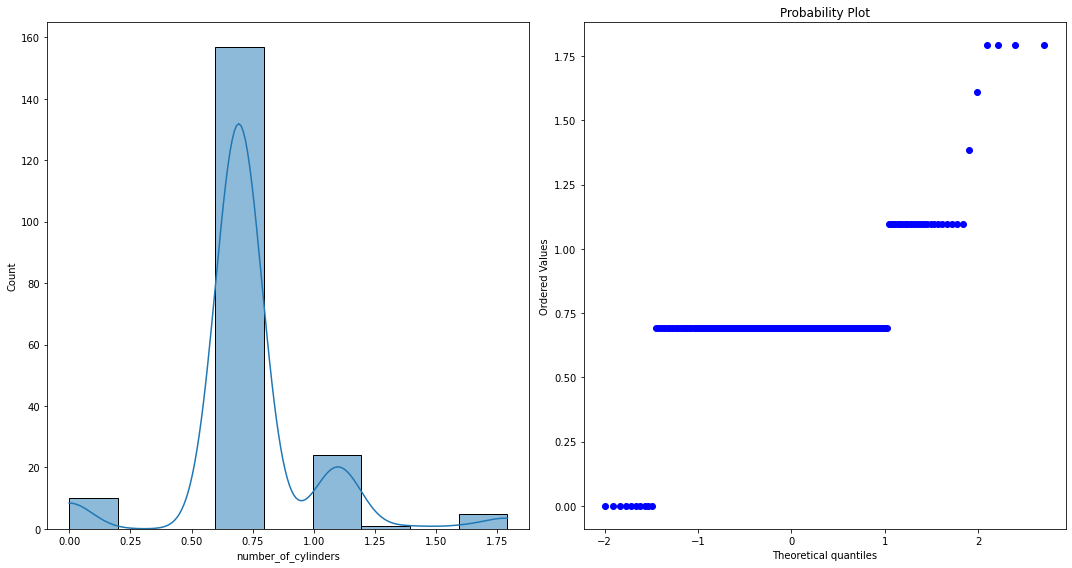

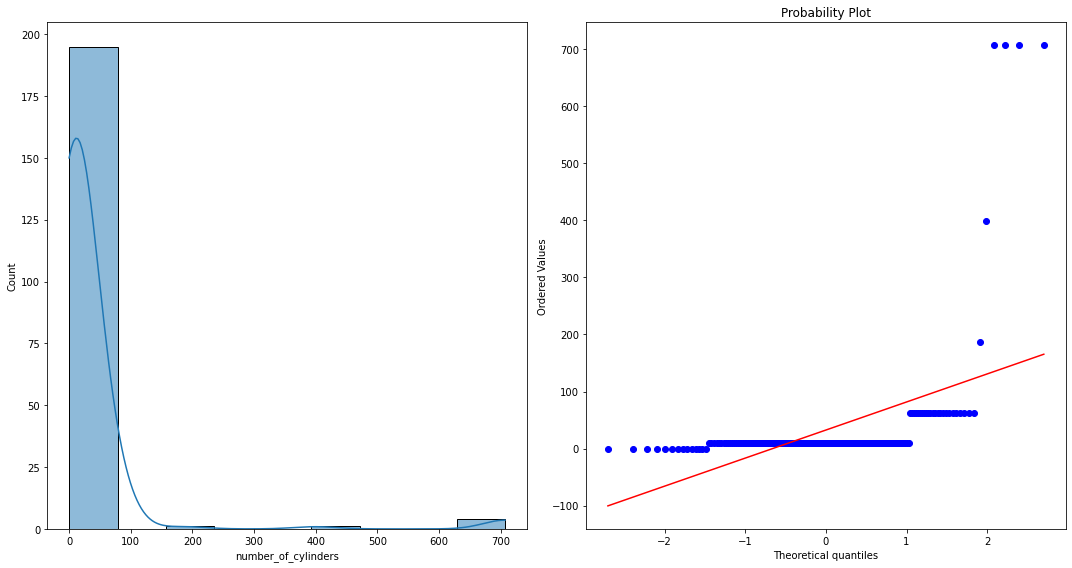

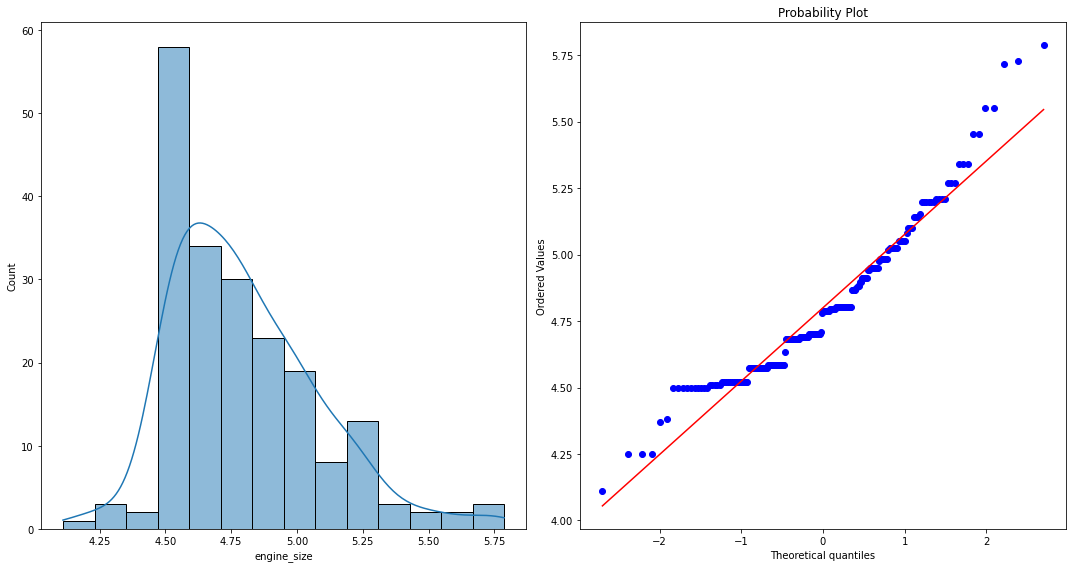

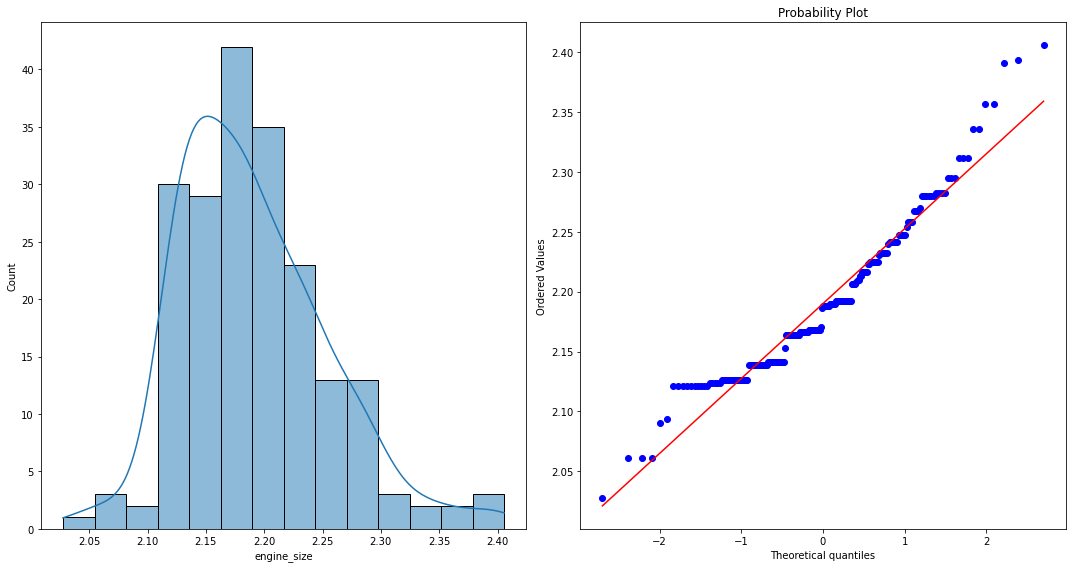

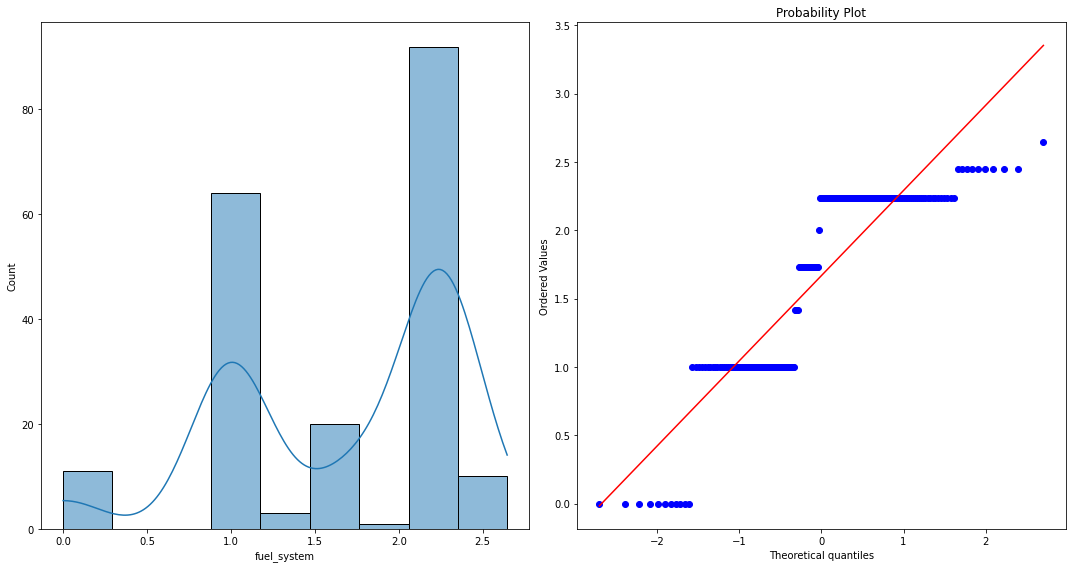

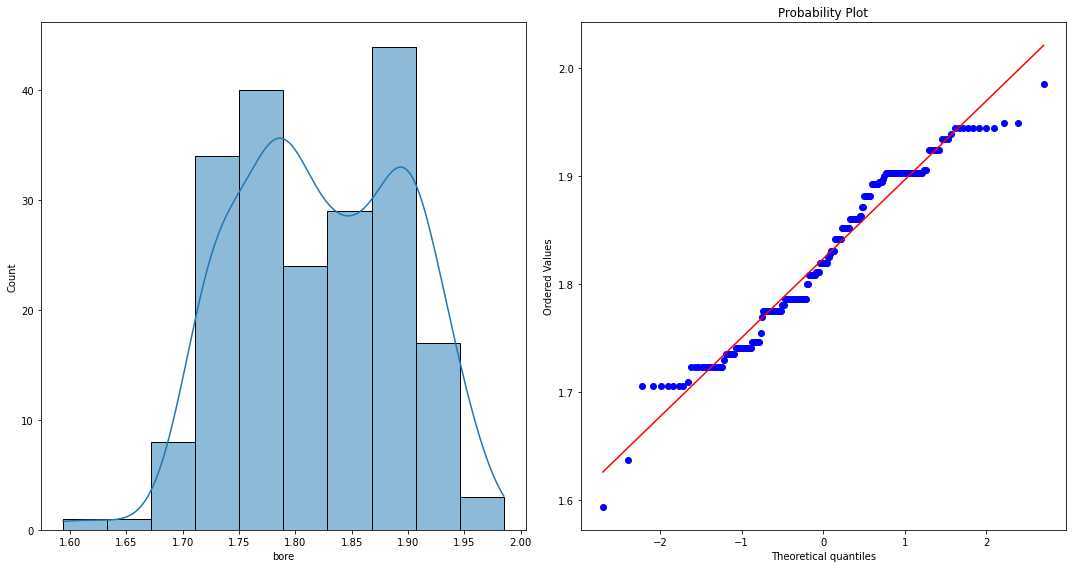

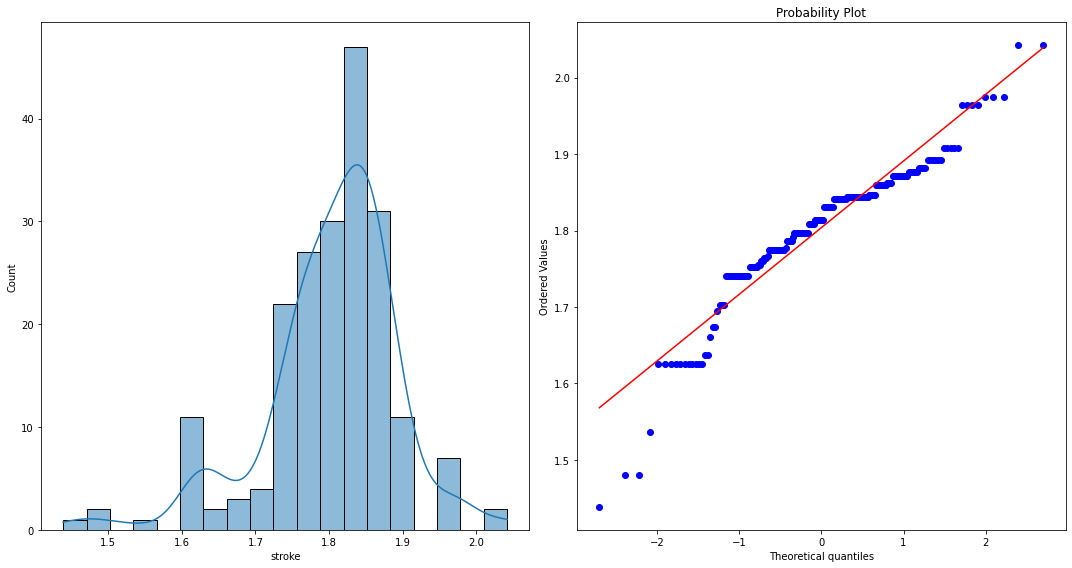

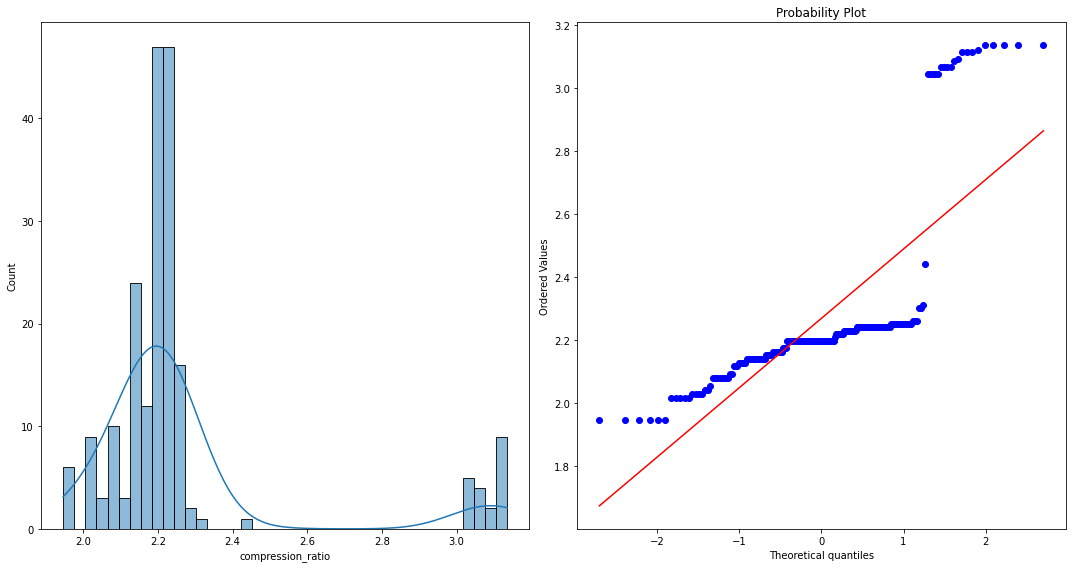

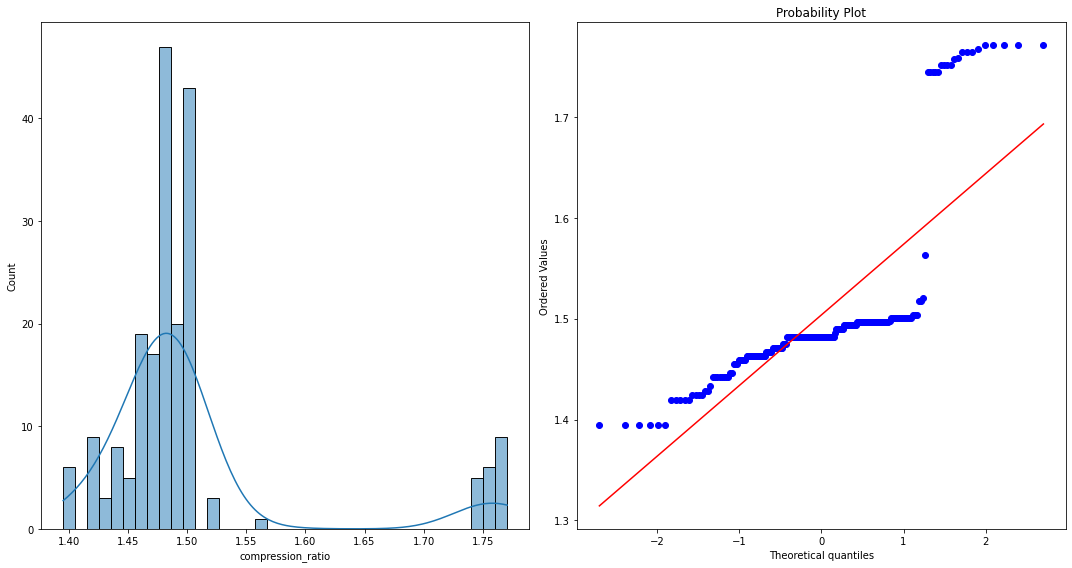

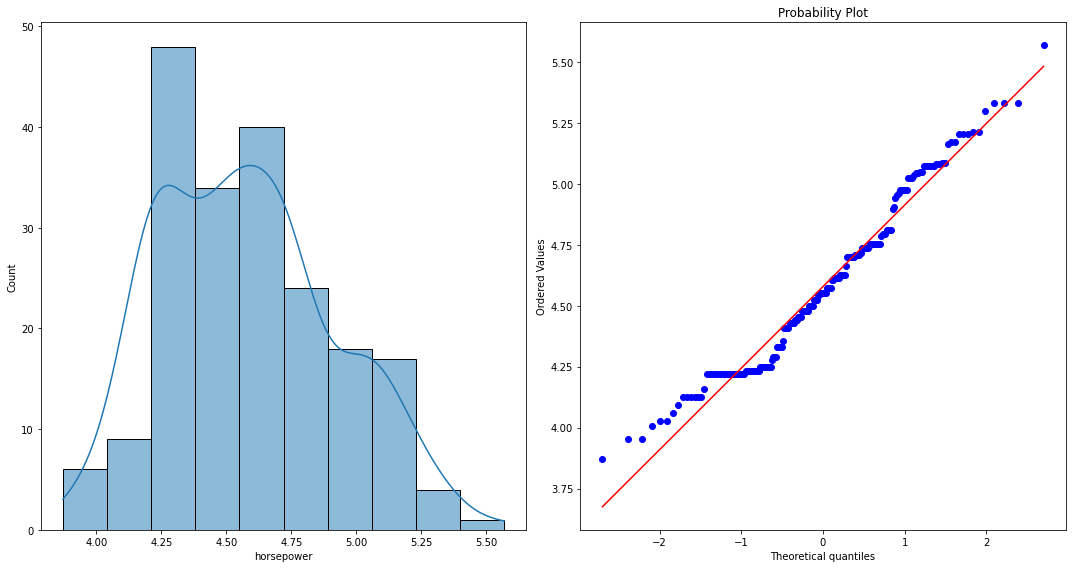

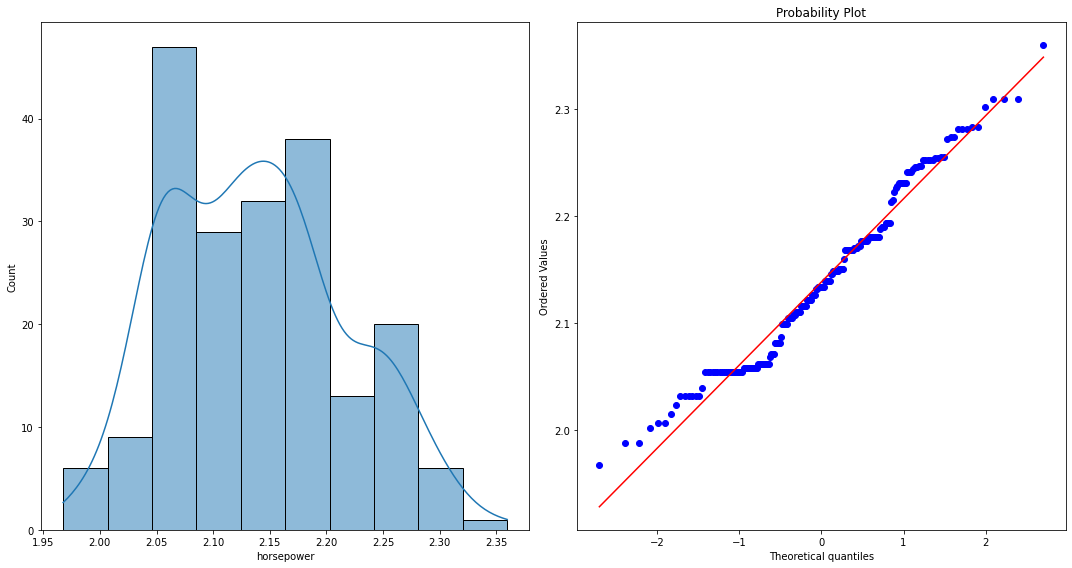

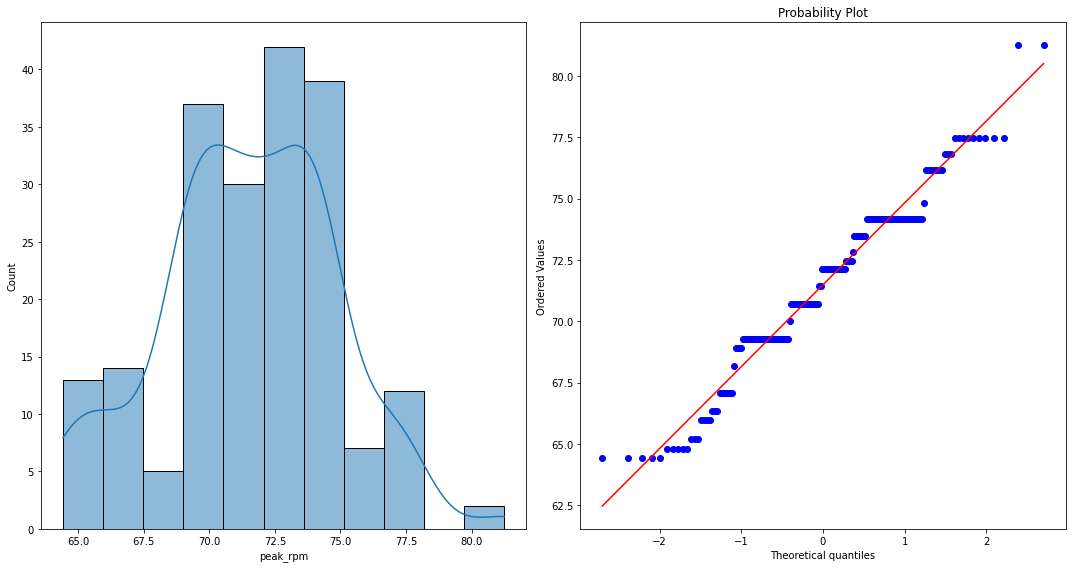

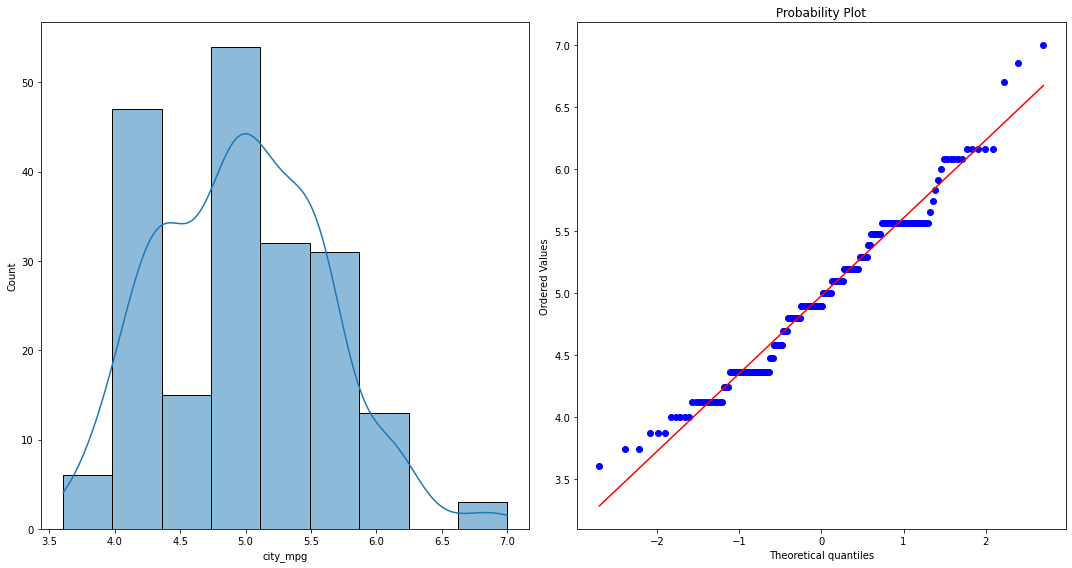

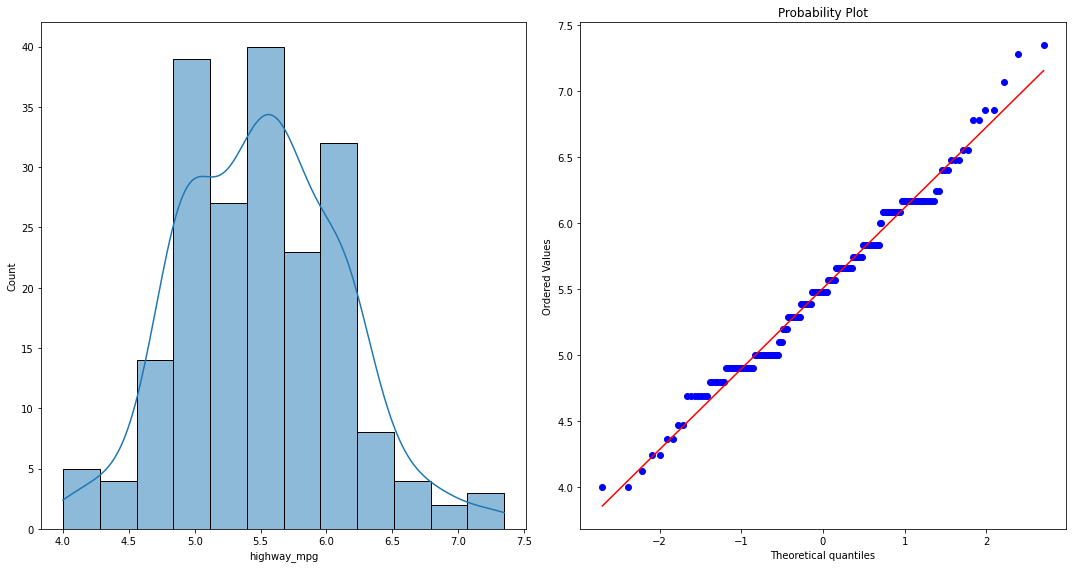

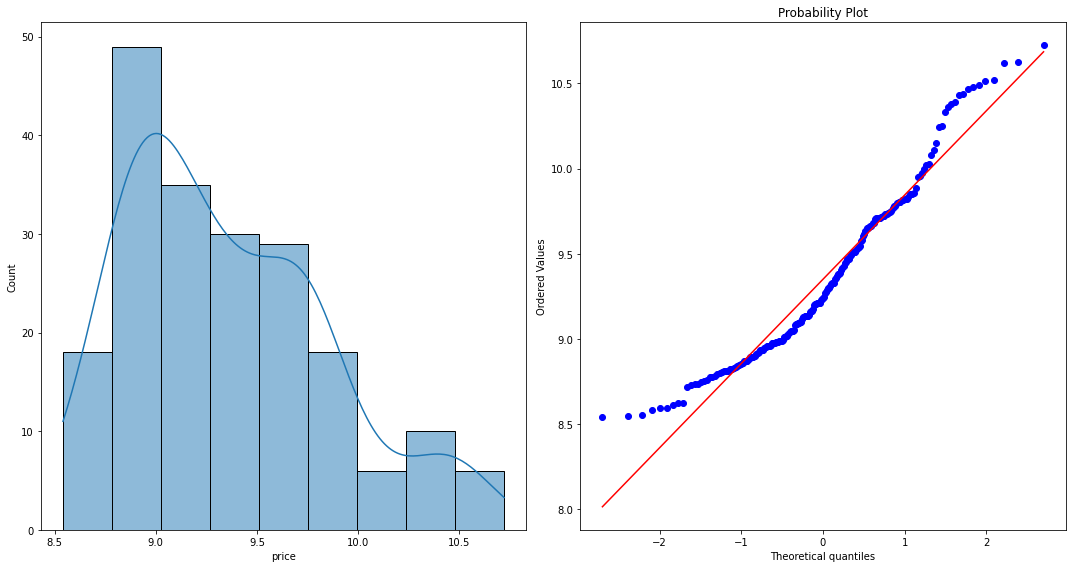

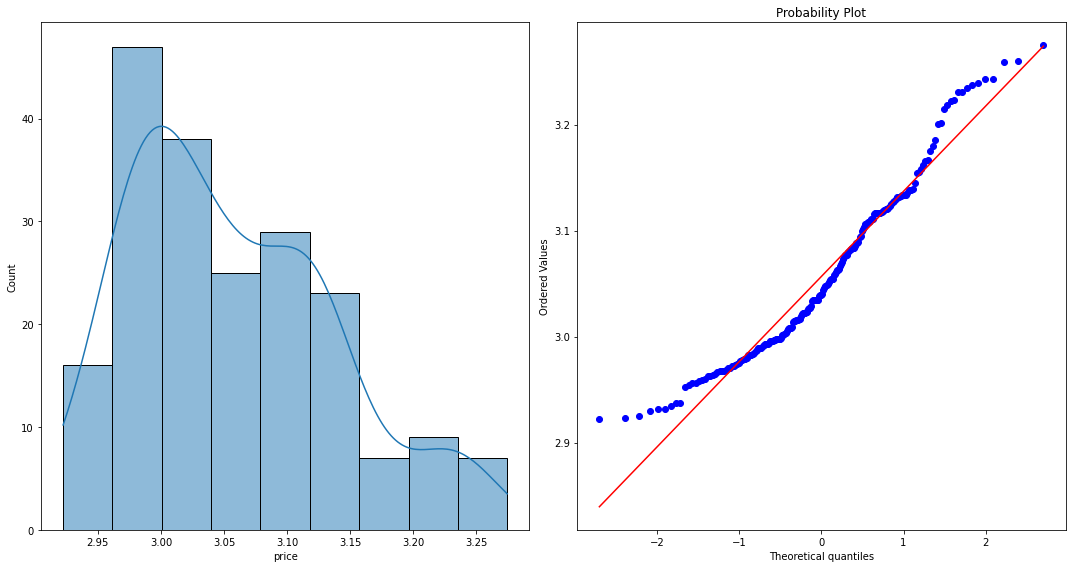

In [630]:
for i in data.columns:
    if((data[i].dtype!='object')&(data[i].nunique()>5)):
        if((data[i].skew()>1)|(data[i].skew()<-1)):
            data[i]=pd.Series(np.log(data[i].copy()))
            plt.figure(figsize=(15,8))
            plt.subplot(121)
            sns.histplot(data,x=data[i],kde=True)

            plt.subplot(122)
            stats.probplot(data[i],dist='norm',plot=plt)
            plt.tight_layout()
        if((data[i].skew()<0)|(data[i].skew()>-1)):
            data[i]=pd.Series(np.sqrt(data[i].copy()))
            plt.figure(figsize=(15,8))
            plt.subplot(121)
            sns.histplot(data,x=data[i],kde=True)

            plt.subplot(122)
            stats.probplot(data[i],dist='norm',plot=plt)
            plt.tight_layout()
        else:
            data[i],_=pd.Series(stats.yeojohnson(data[i].copy()))
            plt.figure(figsize=(15,8))
            plt.subplot(121)
            sns.histplot(data,x=data[i],kde=True)

            plt.subplot(122)
            stats.probplot(data[i],dist='norm',plot=plt)
            plt.tight_layout()

In [631]:
for i in data.columns:
    print(i,data[i].skew())

symboling -0.1507480968810712
normalized_losses 0.20082014690836208
make -0.9064517731938344
fuel_type -2.6960723403217095
aspiration 1.6863838635859196
number_of_doors 0.2731565773124672
body_style -0.6711134241499194
drive_wheels -0.03358847370545811
engine_location 8.061230492758208
wheel_base 0.8478114565299535
length 0.052768891051905735
width 0.8303051308534958
height -0.023322696622217382
curb_weight 0.4935268921334466
engine_type -1.846334831297762
number_of_cylinders 6.033050861139557
engine_size 0.7691059439226555
fuel_system -0.7336061256774815
bore -0.09747344101347624
stroke -0.9972582102559219
compression_ratio 2.2638573261899615
horsepower 0.3251870137537459
peak_rpm -0.05054614750673328
city_mpg 0.3182713554780463
highway_mpg 0.2062401428164346
price 0.6257629658024048


### Outliers plot after transformations

C:\Users\aikik\AppData\Local\Temp\ipykernel_16188\2430078869.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



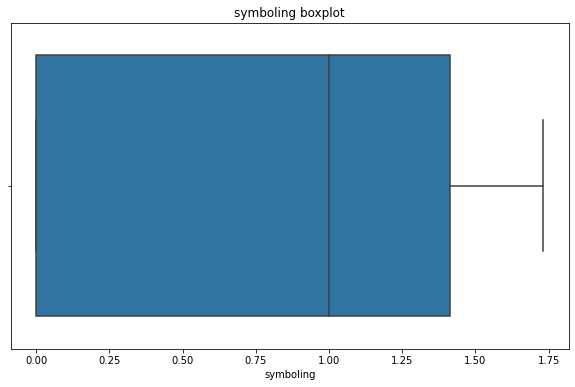

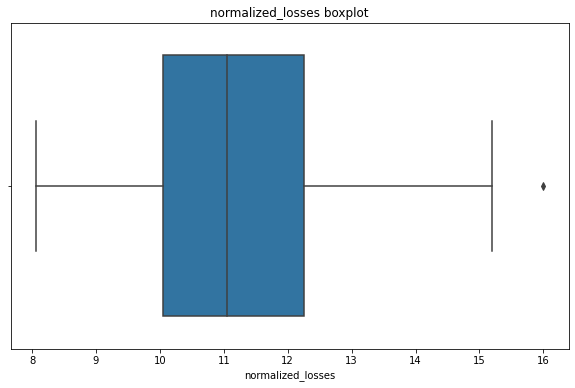

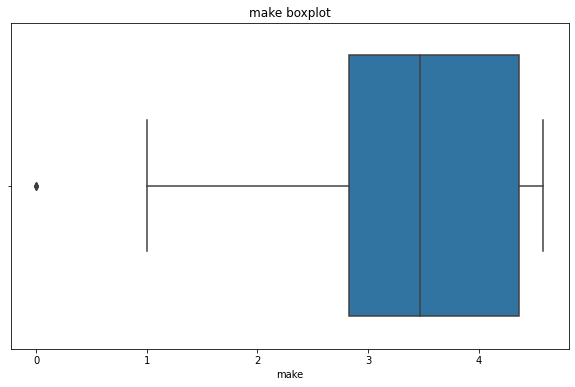

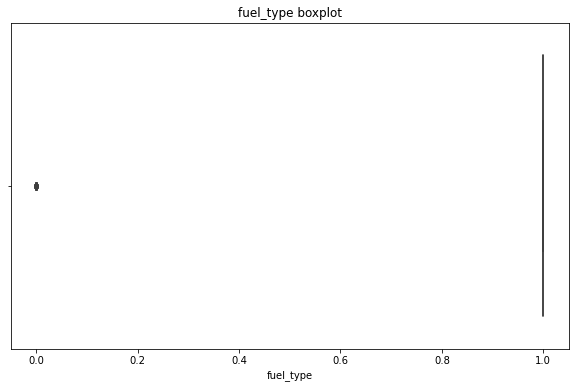

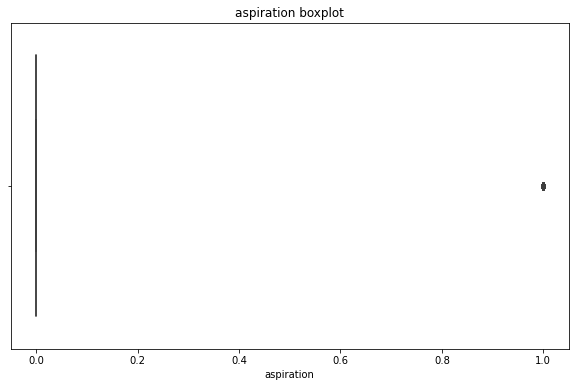

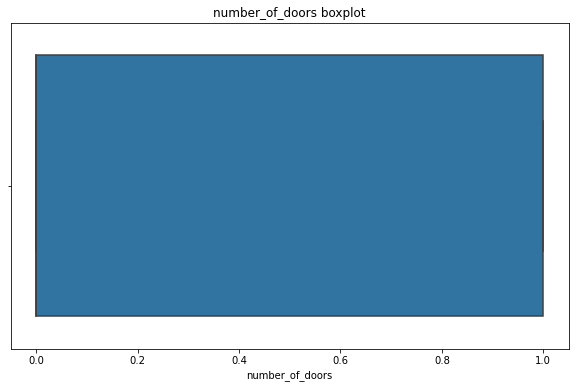

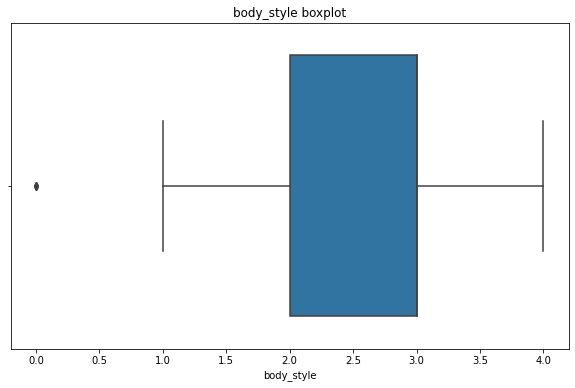

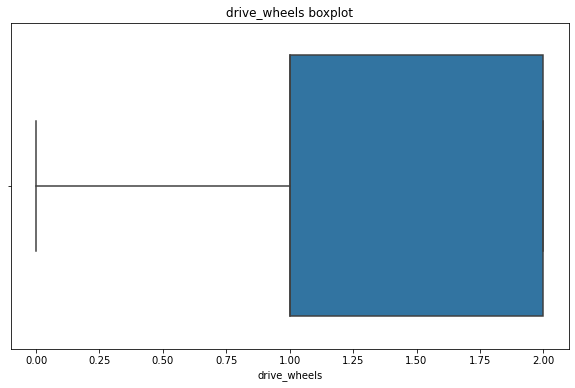

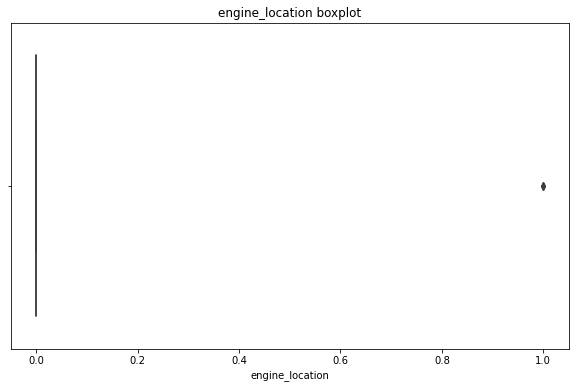

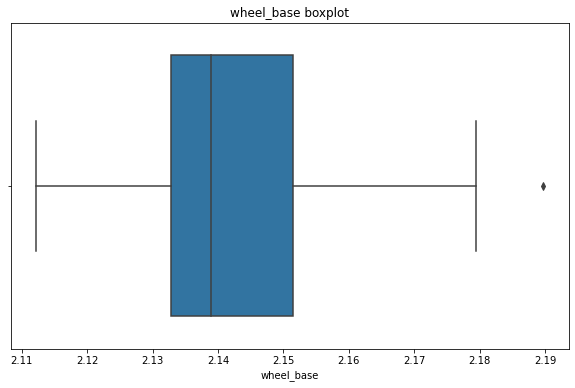

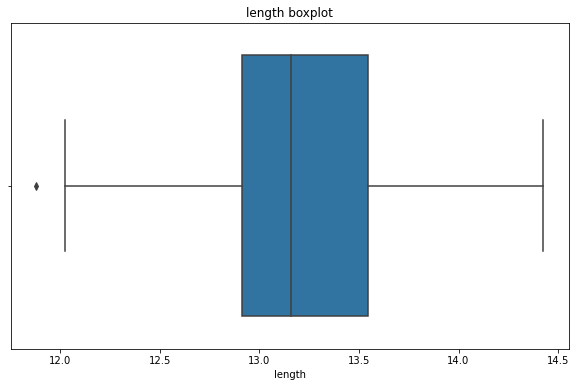

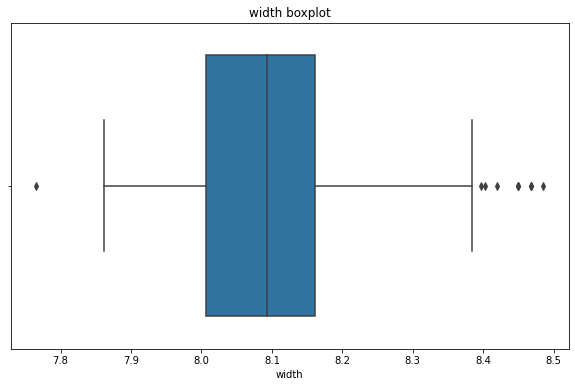

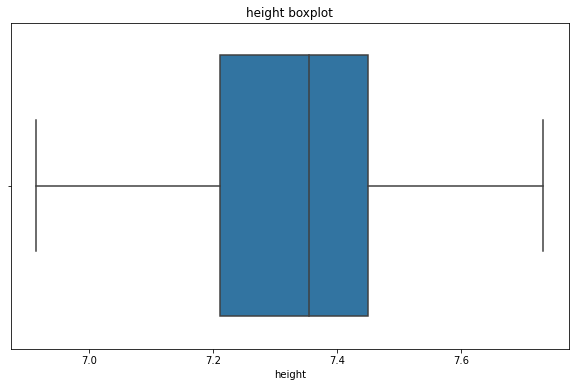

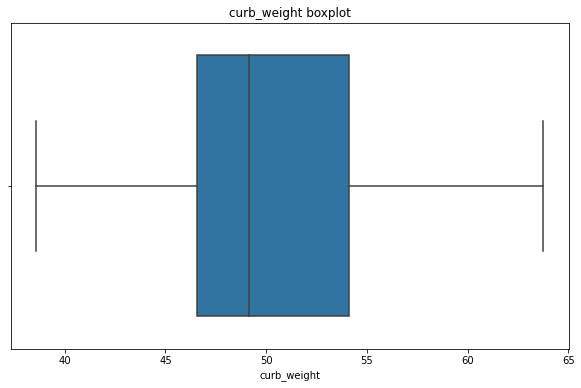

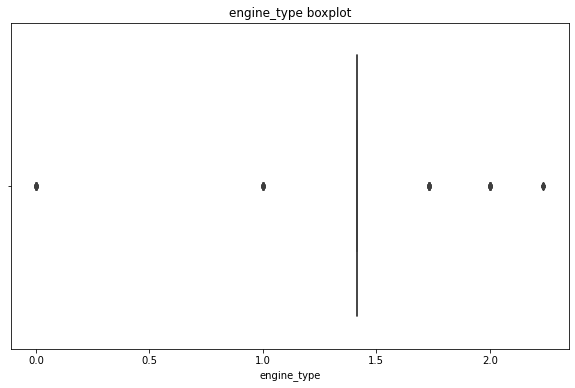

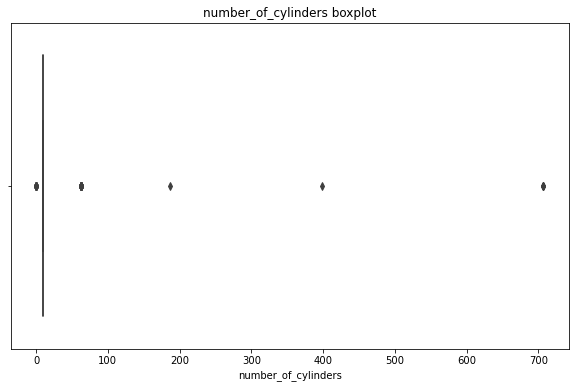

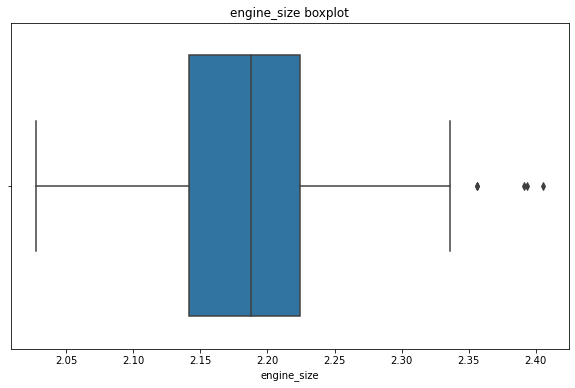

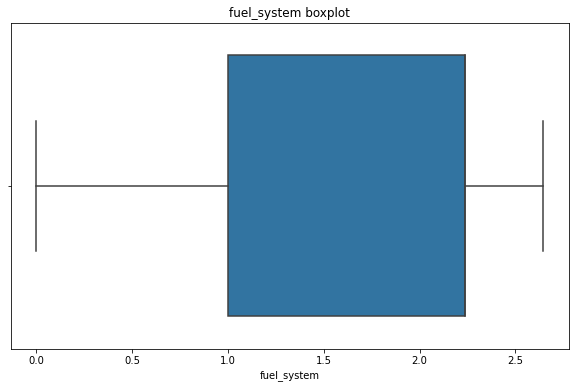

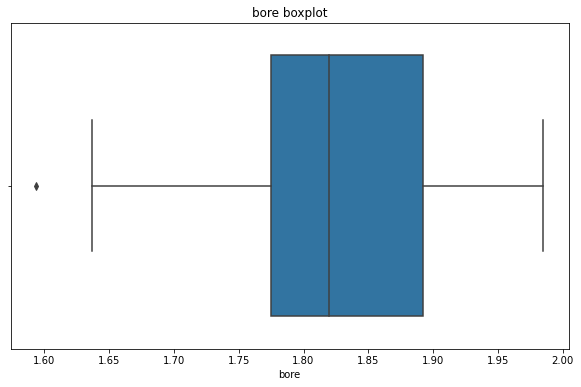

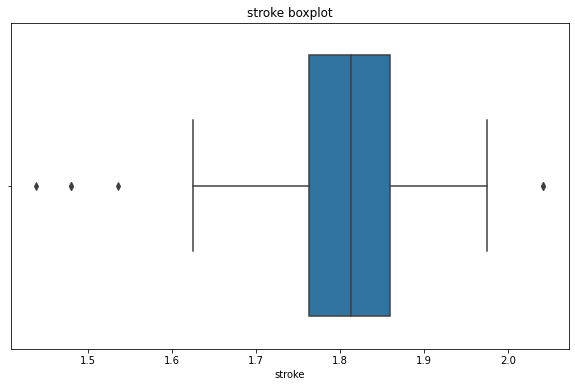

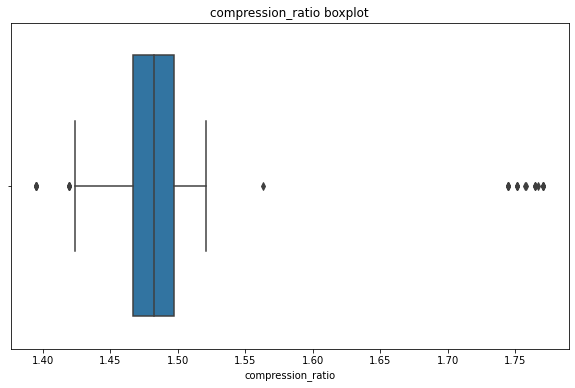

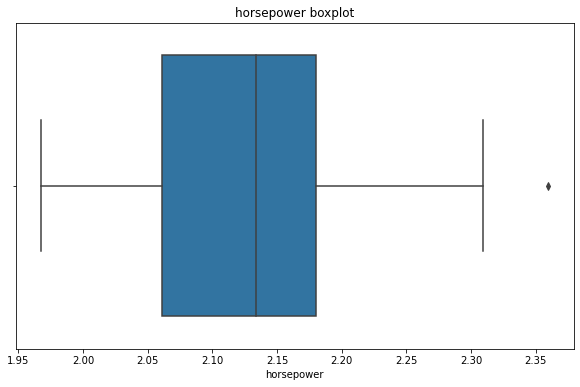

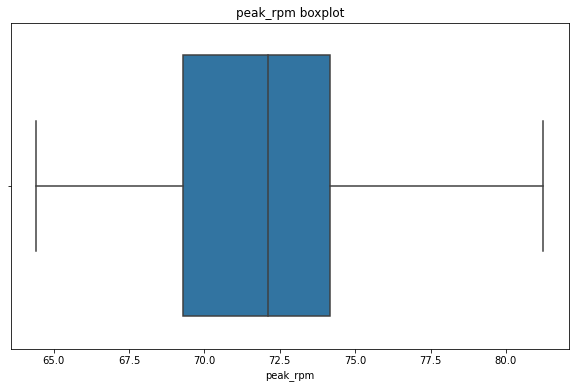

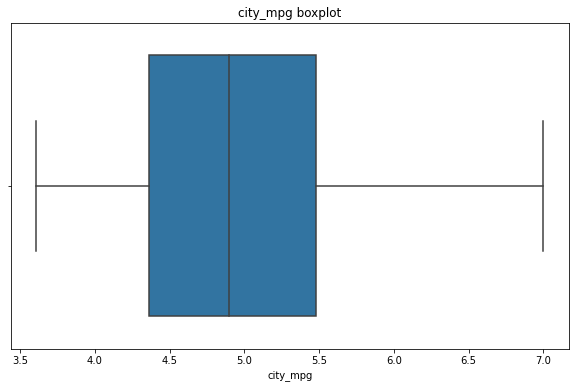

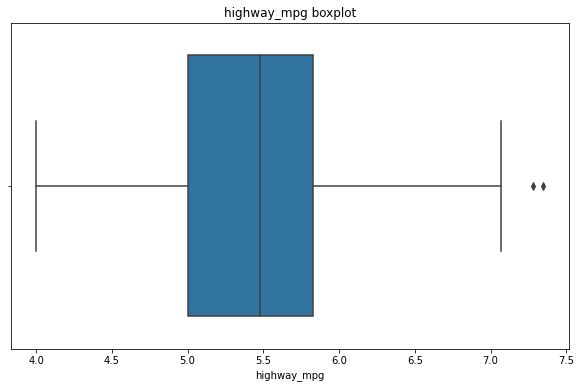

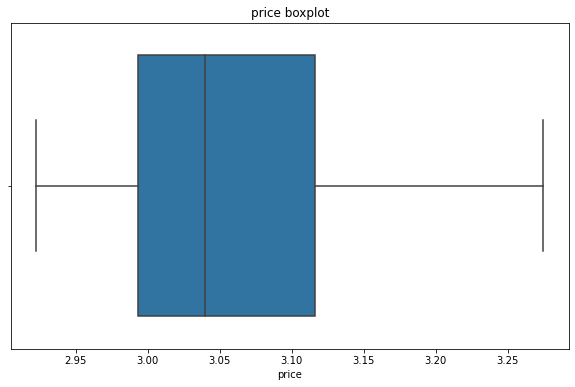

In [632]:
for i in data.columns:
    plt.figure(figsize=(10,6))
    plt.subplot(111)
    plt.title('{} boxplot'.format(i))
    sns.boxplot(x=data[i])

### Outliers Treatment with IQR

In [633]:
for i in data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    if(iqr>0):
        data[i]=np.where(data[i]>upper,upper,np.where(data[i]<lower,lower,data[i]))
        print(q1,q3)
        print(iqr)
        print(data[i])

0.0 1.4142135623730951
1.4142135623730951
0      1.732051
1      1.732051
2      1.000000
3      1.414214
4      1.414214
         ...   
196         NaN
197         NaN
198         NaN
199         NaN
200         NaN
Name: symboling, Length: 201, dtype: float64
10.04987562112089 12.24744871391589
2.1975730927950003
0      12.961481
1      12.961481
2      12.961481
3      12.806248
4      12.806248
         ...    
196     9.746794
197     9.746794
198     9.746794
199     9.746794
200     9.746794
Name: normalized_losses, Length: 201, dtype: float64
2.8284271247461903 4.358898943540674
1.5304718187944837
0      0.532719
1      0.532719
2      0.532719
3      1.000000
4      1.000000
         ...   
196    4.582576
197    4.582576
198    4.582576
199    4.582576
200    4.582576
Name: make, Length: 201, dtype: float64
0.0 1.0
1.0
0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
196    0.0
197    0.0
198    0.0
199    0.0
200    0.0
Name: number_of_doors, Length: 201, d

### Outliers visualization

C:\Users\aikik\AppData\Local\Temp\ipykernel_16188\2430078869.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



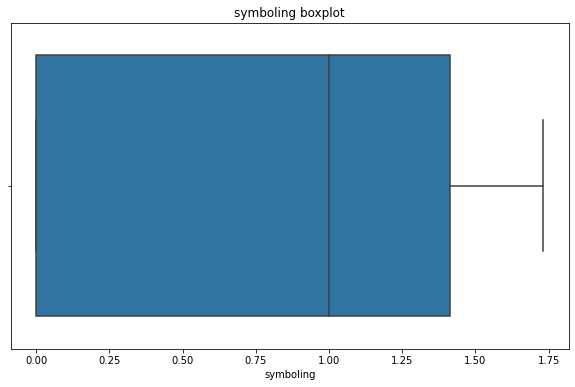

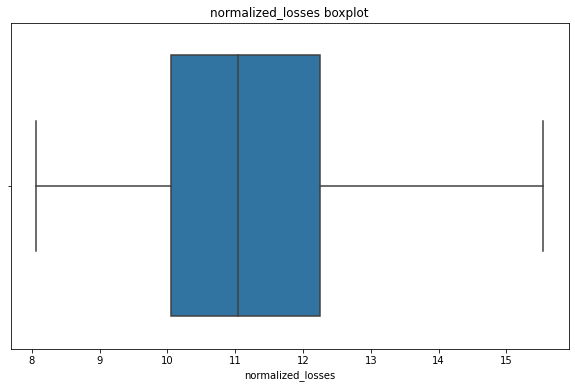

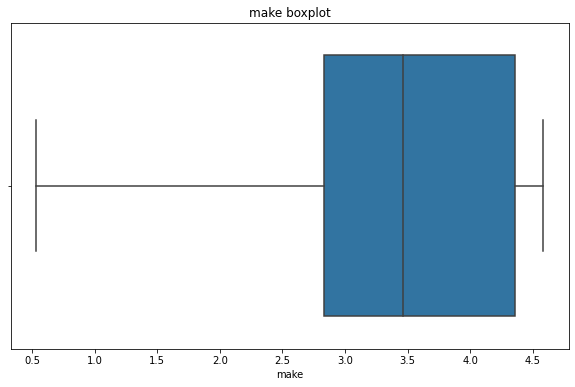

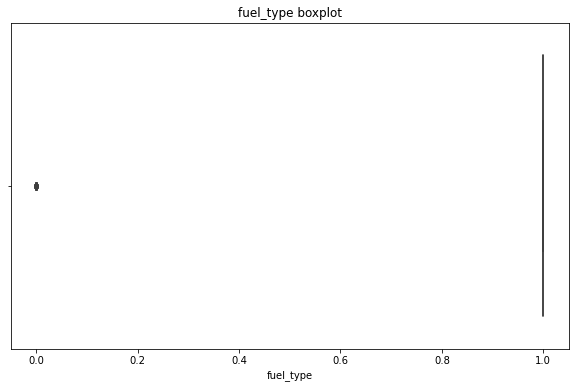

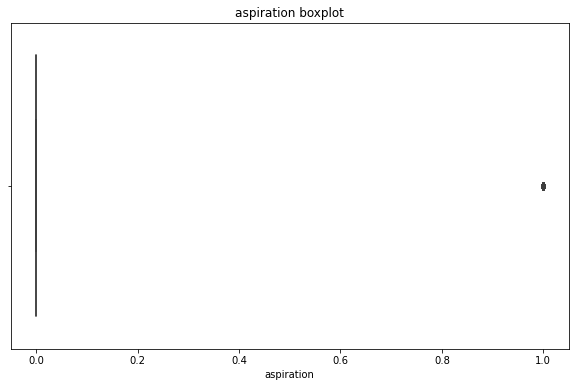

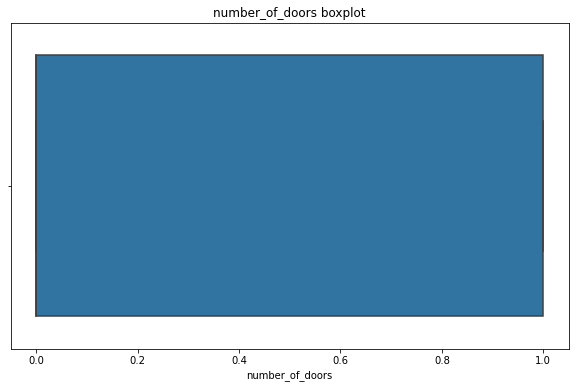

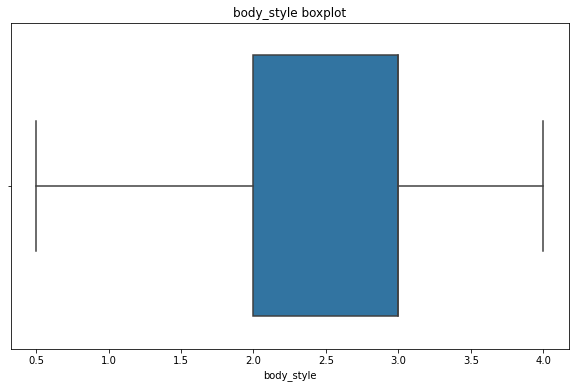

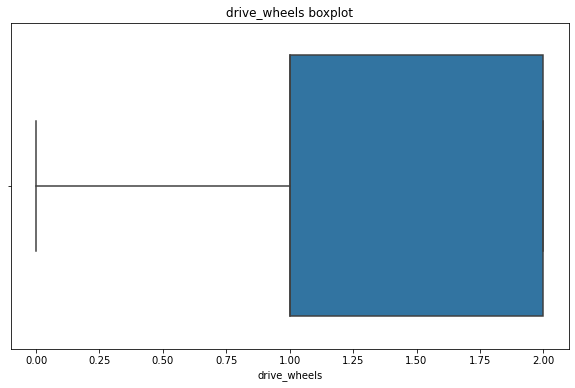

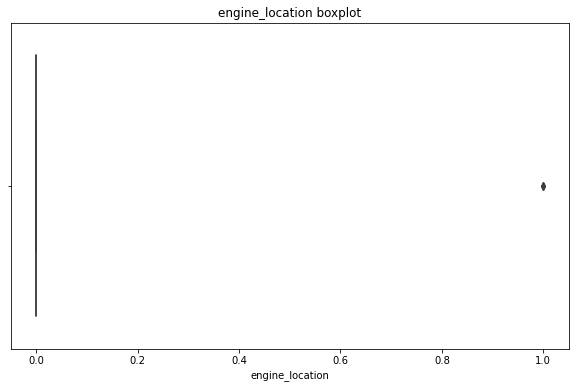

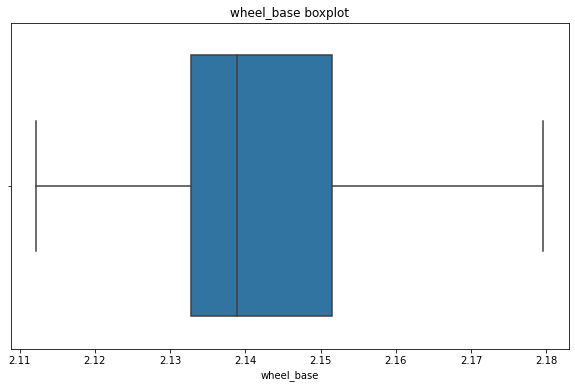

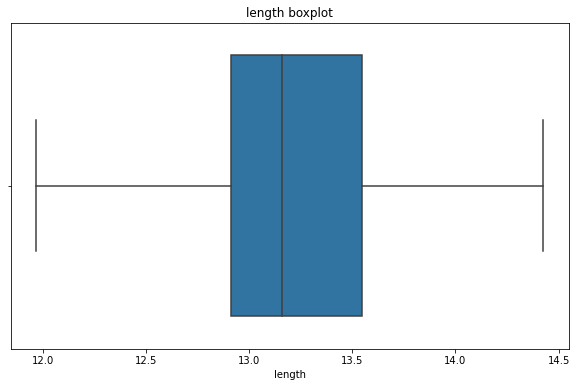

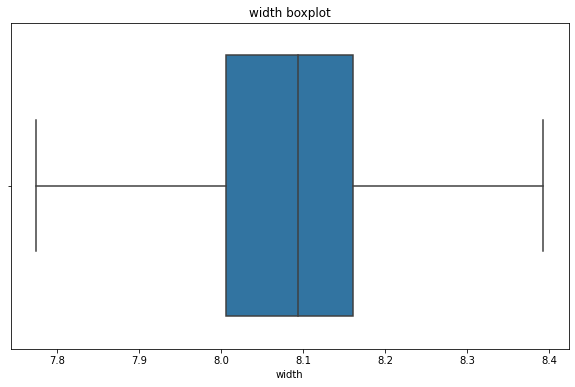

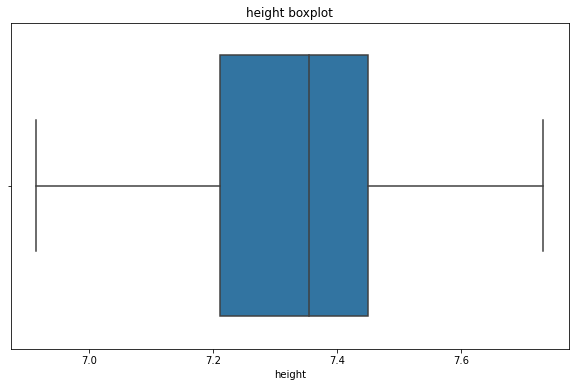

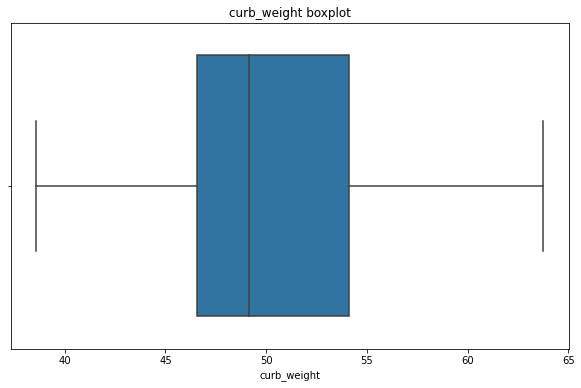

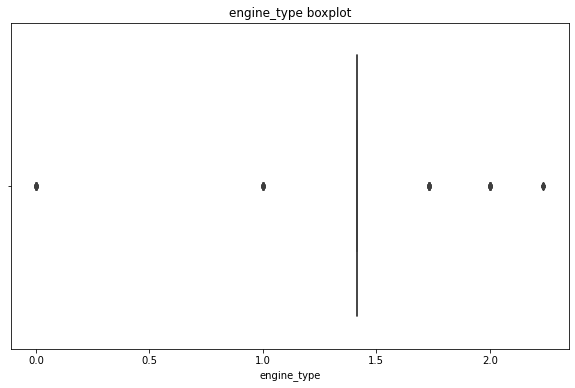

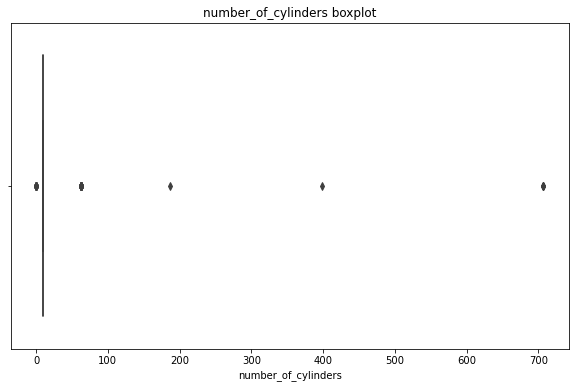

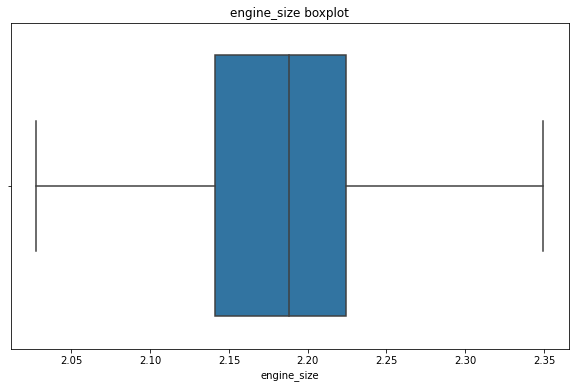

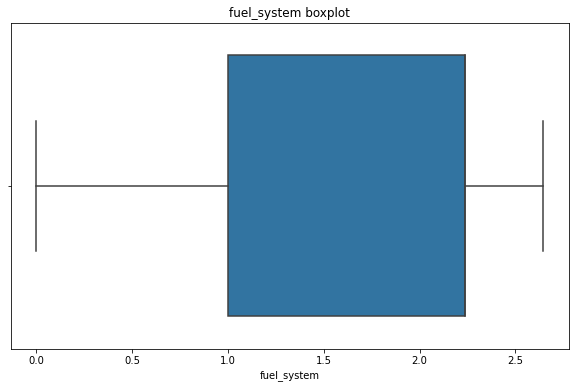

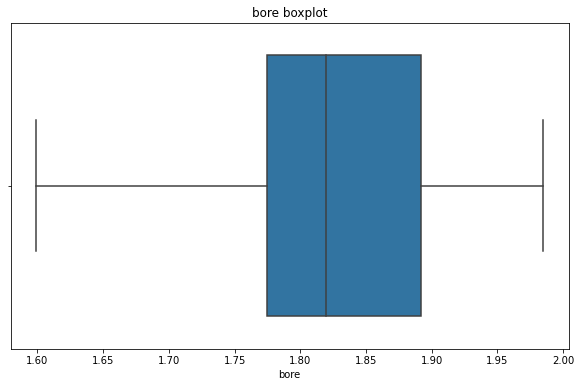

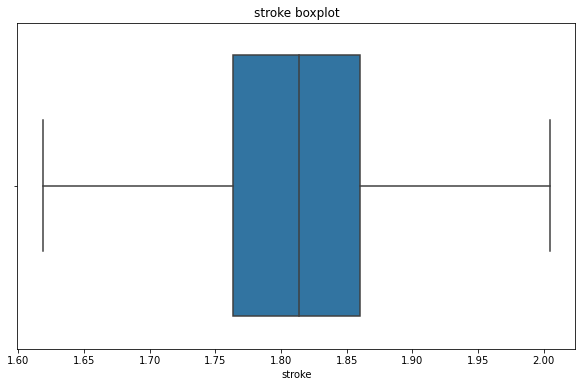

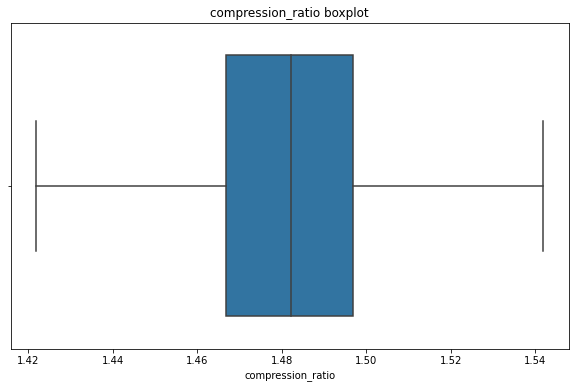

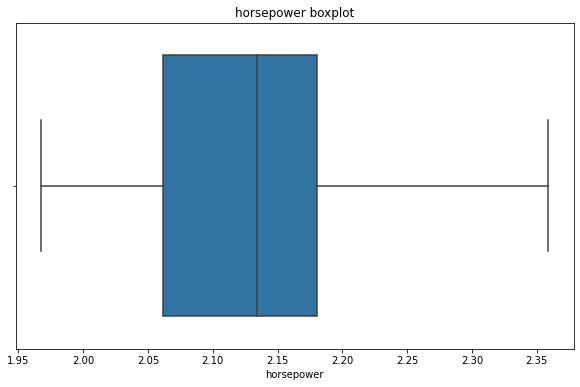

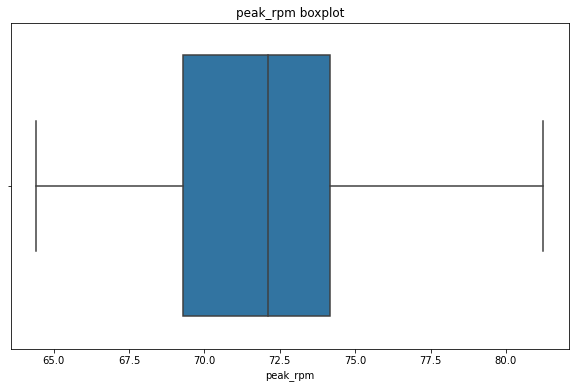

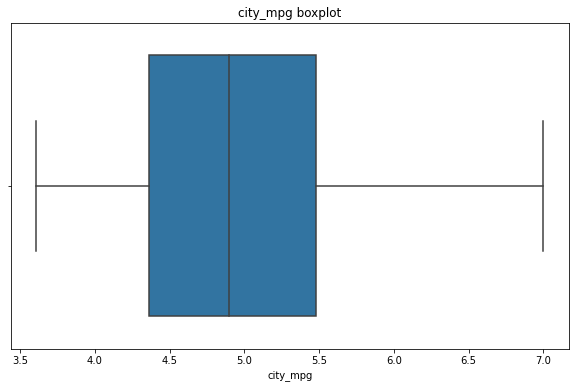

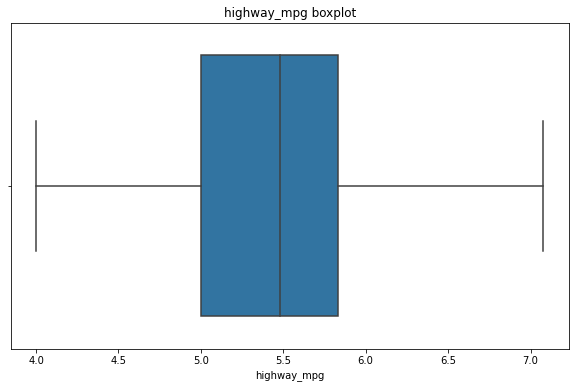

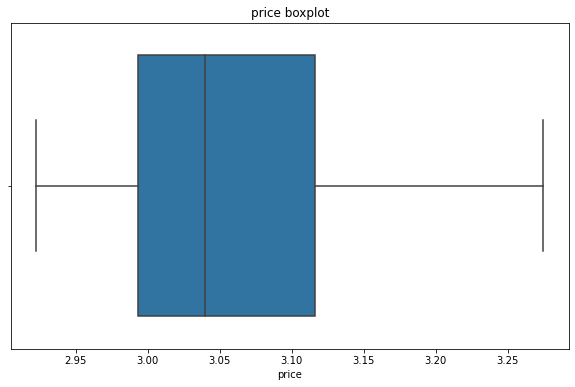

In [634]:
for i in data.columns:
    plt.figure(figsize=(10,6))
    plt.subplot(111)
    plt.title('{} boxplot'.format(i))
    sns.boxplot(x=data[i])

In [635]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.732051,12.961481,0.532719,1,0,1.0,0.5,2.0,0,2.117577,...,2.206249,2.236068,1.862794,1.637071,1.482304,2.170145,70.710678,4.582576,5.196152,3.083841
1,1.732051,12.961481,0.532719,1,0,1.0,0.5,2.0,0,2.117577,...,2.206249,2.236068,1.862794,1.637071,1.482304,2.170145,70.710678,4.582576,5.196152,3.116266
2,1.000000,12.961481,0.532719,1,0,1.0,2.0,2.0,0,2.132745,...,2.241401,2.236068,1.637071,1.862794,1.482304,2.244316,70.710678,4.358899,5.099020,3.116266
3,1.414214,12.806248,1.000000,1,0,0.0,3.0,1.0,0,2.145500,...,2.165952,2.236068,1.786057,1.843909,1.517427,2.150575,74.161985,4.898979,5.477226,3.089213
4,1.414214,12.806248,1.000000,1,0,0.0,3.0,0.0,0,2.144563,...,2.216451,2.236068,1.786057,1.843909,1.442027,2.178287,74.161985,4.242641,4.690416,3.125235


### Feature Scaling 

In [636]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()

In [637]:
X=data.drop(columns={'price'})
y=data[['price']]

In [638]:
y

,price
0,3.083841
1,3.116266
2,3.116266
3,3.089213
4,3.125235
...,...
196,3.119585
197,3.139197
198,3.158340
199,3.165428


In [639]:
for i in X.columns:
    X[i]=standard.fit_transform(X[i].values.reshape(-1,1))

In [640]:
X.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,1.362585,1.268361,-2.707473,0.332411,-0.467099,1.144703,-2.598808,1.213477,-0.123091,-1.824675,...,-0.218296,0.277674,0.823135,0.538150,-2.087855,-0.021184,0.407290,-0.231402,-0.629504,-0.510828
1,1.362585,1.268361,-2.707473,0.332411,-0.467099,1.144703,-2.598808,1.213477,-0.123091,-1.824675,...,-0.218296,0.277674,0.823135,0.538150,-2.087855,-0.021184,0.407290,-0.231402,-0.629504,-0.510828
2,0.270955,1.268361,-2.707473,0.332411,-0.467099,1.144703,-0.770242,1.213477,-0.123091,-0.719819,...,0.298936,0.852010,0.823135,-2.537039,0.700257,-0.021184,1.358573,-0.231402,-0.985286,-0.672185
3,0.888628,1.163290,-2.258352,0.332411,-0.467099,-0.873589,0.448802,-0.606739,-0.123091,0.209274,...,-0.218296,-0.380716,0.823135,-0.507287,0.466994,1.145661,0.156290,0.799302,-0.126229,-0.043910
4,0.888628,1.163290,-2.258352,0.332411,-0.467099,-0.873589,0.448802,-2.426955,-0.123091,0.141084,...,-0.317285,0.444358,0.823135,-0.507287,0.466994,-1.359238,0.511708,0.799302,-1.170207,-1.350957


In [641]:
y['price']=standard.fit_transform(y.loc[:,'price'].values.reshape(-1,1))

C:\Users\aikik\AppData\Local\Temp\ipykernel_16188\128661622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [642]:
y

,price
0,0.333767
1,0.732749
2,0.732749
3,0.399864
4,0.843108
...,...
196,0.773581
197,1.014906
198,1.250447
199,1.337668


In [643]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [647]:
X_test.isnull().sum()

symboling              6
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
dtype: int64